In [ ]:
# # # # # # 한글글꼴 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,772 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
### zip 풀기 ###
# %cd "/content/drive/MyDrive/AI인턴십_4기"
# !unzip -qq "/content/drive/MyDrive/AI인턴십_4기/SBJ_2405_002.zip"

/content/drive/MyDrive/AI인턴십_4기


# 데이터 불러오기
1,2,3,6,8

1. 오산시_추정교통량.csv공개13 col
2. 오산시_상세도로망.geojson공개16 col
3. 오산시_도로명주소(도로).geojson공개20 col
6. 6)오산시_교통사고이력.geojson공개4 col
8. 8)오산시_상권정보.csv공개14 col

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas

In [ ]:
import os

## for data
import pandas as pd
import numpy as np
import statsmodels.api as sm

## for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatches
import matplotlib.ticker as plticker

plt.rc('font', family='NanumBarunGothic') # 한글글꼴설정
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from IPython.display import display

## geo
import geopandas as gpd
import folium

import warnings
warnings.filterwarnings(action='ignore')

#셀 값 긴 경우 모두 보이게 설정
pd.options.display.max_colwidth = None
#모든 열 값 보이기
pd.set_option('display.max_columns', None)
#모든 행 값 보이기
pd.set_option('display.max_row', None)

In [ ]:
traffic = pd.read_csv('/content/drive/MyDrive/AI인턴십_4기/1.오산시_추정교통량.csv', encoding='utf-8-sig')
commercial_district = pd.read_csv('/content/drive/MyDrive/AI인턴십_4기/8.오산시_상권정보.csv', encoding='utf-8-sig')

road_network = gpd.read_file('/content/drive/MyDrive/AI인턴십_4기/2.오산시_상세도로망.geojson')
street_addr = gpd.read_file('/content/drive/MyDrive/AI인턴십_4기/3.오산시_도로명주소(도로).geojson')
accident_history = gpd.read_file('/content/drive/MyDrive/AI인턴십_4기/6.오산시_교통사고이력.geojson')

# 1. 오산시_추정교통량.csv
- 오산시 일별 시간대별 추정교통량(2020~2022)
- year과 time slot(시간) 컬럼 존

In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382220 entries, 0 to 3382219
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   year         int64  
 1   link_id      int64  
 2   road_rank    int64  
 3   road_length  float64
 4   road_nm      object 
 5   sido_nm      object 
 6   sgg_nm       object 
 7   emd_nm       object 
 8   timeslot     object 
 9   ALL_AADT     int64  
 10  PSCR_AADT    int64  
 11  BUS_AADT     int64  
 12  FGCR_AADT    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 335.5+ MB


In [ ]:
traffic.isnull().sum()

year                0
link_id             0
road_rank           0
road_length         0
road_nm        518434
sido_nm             0
sgg_nm              0
emd_nm              0
timeslot            0
ALL_AADT            0
PSCR_AADT           0
BUS_AADT            0
FGCR_AADT           0
dtype: int64

In [ ]:
traffic[traffic['road_nm'].isnull()]

In [ ]:
traffic.head()

,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT
0,2020,46784522701,101,0.711,서해안고속도로,경기도,평택시,포승읍,0,347,229,3,115
1,2020,46784607201,101,1.367,서해안고속도로,경기도,평택시,포승읍,0,271,172,1,97
2,2020,46784607001,101,1.589,서해안고속도로,경기도,평택시,포승읍,0,305,220,2,83
3,2020,46784607101,101,1.885,서해안고속도로,경기도,평택시,포승읍,0,401,236,2,163
4,2020,46784606901,101,2.190,서해안고속도로,경기도,평택시,포승읍,0,398,227,3,168


In [ ]:
traffic.tail()

,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT
3382215,2022,57124103601,108,0.082,경부고속도로,경기도,오산시,대원동,21,974,833,35,106
3382216,2022,57121000401,108,0.153,경부고속도로,경기도,오산시,대원동,22,577,456,20,101
3382217,2022,57124103601,108,0.082,경부고속도로,경기도,오산시,대원동,22,844,721,27,96
3382218,2022,57121000401,108,0.153,경부고속도로,경기도,오산시,대원동,23,423,306,19,98
3382219,2022,57124103601,108,0.082,경부고속도로,경기도,오산시,대원동,23,620,494,21,104


## link_id    도로의 링크 ID + 끝2자리(상행:01 /하행:02)
- 상행은 서울 방향, 하행은 부산 방향
- 도로의 구체적인 구간 및 방향을 나타냄
- 상행/하행 정보는 방향에 따른 교통량 차이를 반영할 수 있음
- ex.시간대에 따른 상행,하행 교통량 차이

In [ ]:
traffic['link_id'] = traffic['link_id'].astype(str)

traffic['link_direction'] = traffic['link_id'].str[-2:] # 끝 두 자리 추출
traffic['link_id'] = traffic['link_id'].str[:-2] # 끝 두 자리 제거

In [ ]:
traffic.head(10)

,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT,link_direction
0,2020,467845227,101,0.711,서해안고속도로,경기도,평택시,포승읍,0,347,229,3,115,01
1,2020,467846072,101,1.367,서해안고속도로,경기도,평택시,포승읍,0,271,172,1,97,01
2,2020,467846070,101,1.589,서해안고속도로,경기도,평택시,포승읍,0,305,220,2,83,01
3,2020,467846071,101,1.885,서해안고속도로,경기도,평택시,포승읍,0,401,236,2,163,01
4,2020,467846069,101,2.190,서해안고속도로,경기도,평택시,포승읍,0,398,227,3,168,01
5,2020,467810120,101,5.627,서해안고속도로,경기도,평택시,포승읍,0,329,200,2,126,01
6,2020,467810008,101,5.731,서해안고속도로,경기도,평택시,포승읍,0,329,208,3,119,01
7,2020,467845227,101,0.711,서해안고속도로,경기도,평택시,포승읍,1,368,232,3,132,01
8,2020,467846072,101,1.367,서해안고속도로,경기도,평택시,포승읍,1,370,232,2,137,01
9,2020,467846070,101,1.589,서해안고속도로,경기도,평택시,포승읍,1,242,141,2,99,01


In [ ]:
traffic['link_direction'].unique()

array(['01', '02'], dtype=object)

<Axes: xlabel='link_id'>

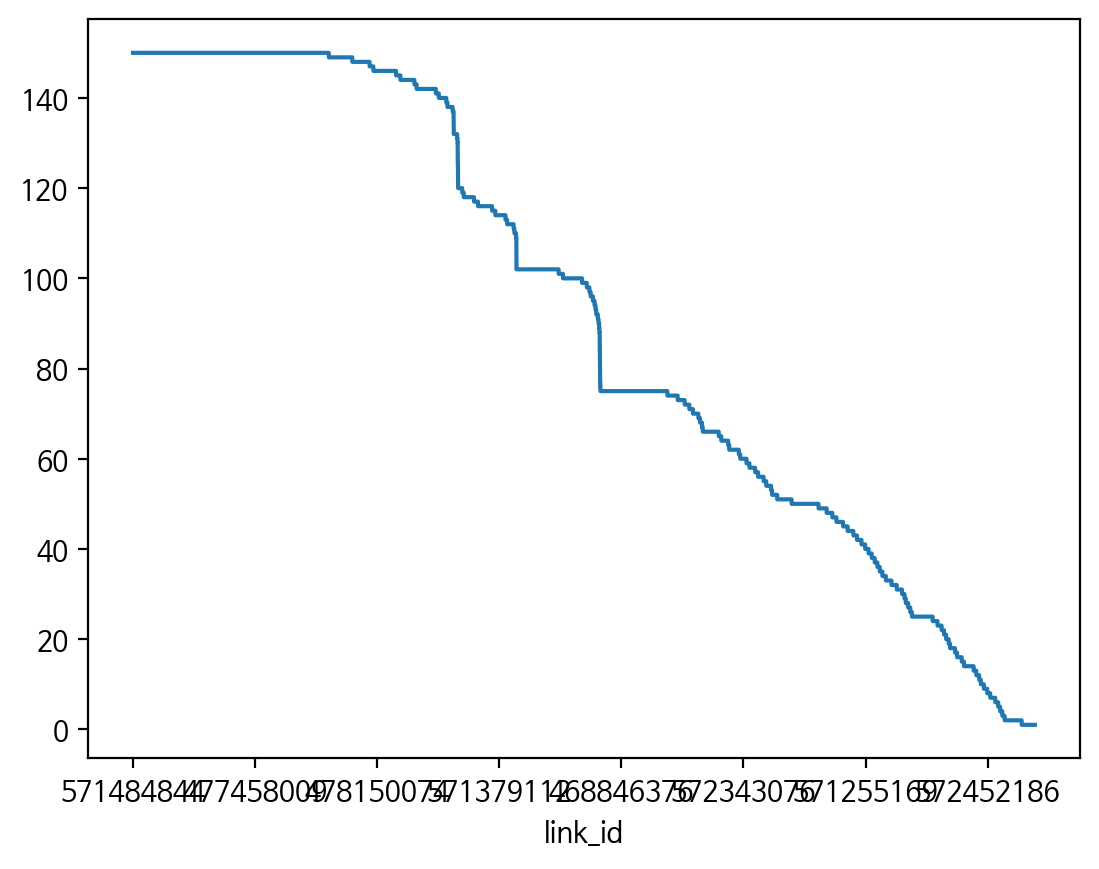

In [ ]:
traffic['link_id'].value_counts().plot()

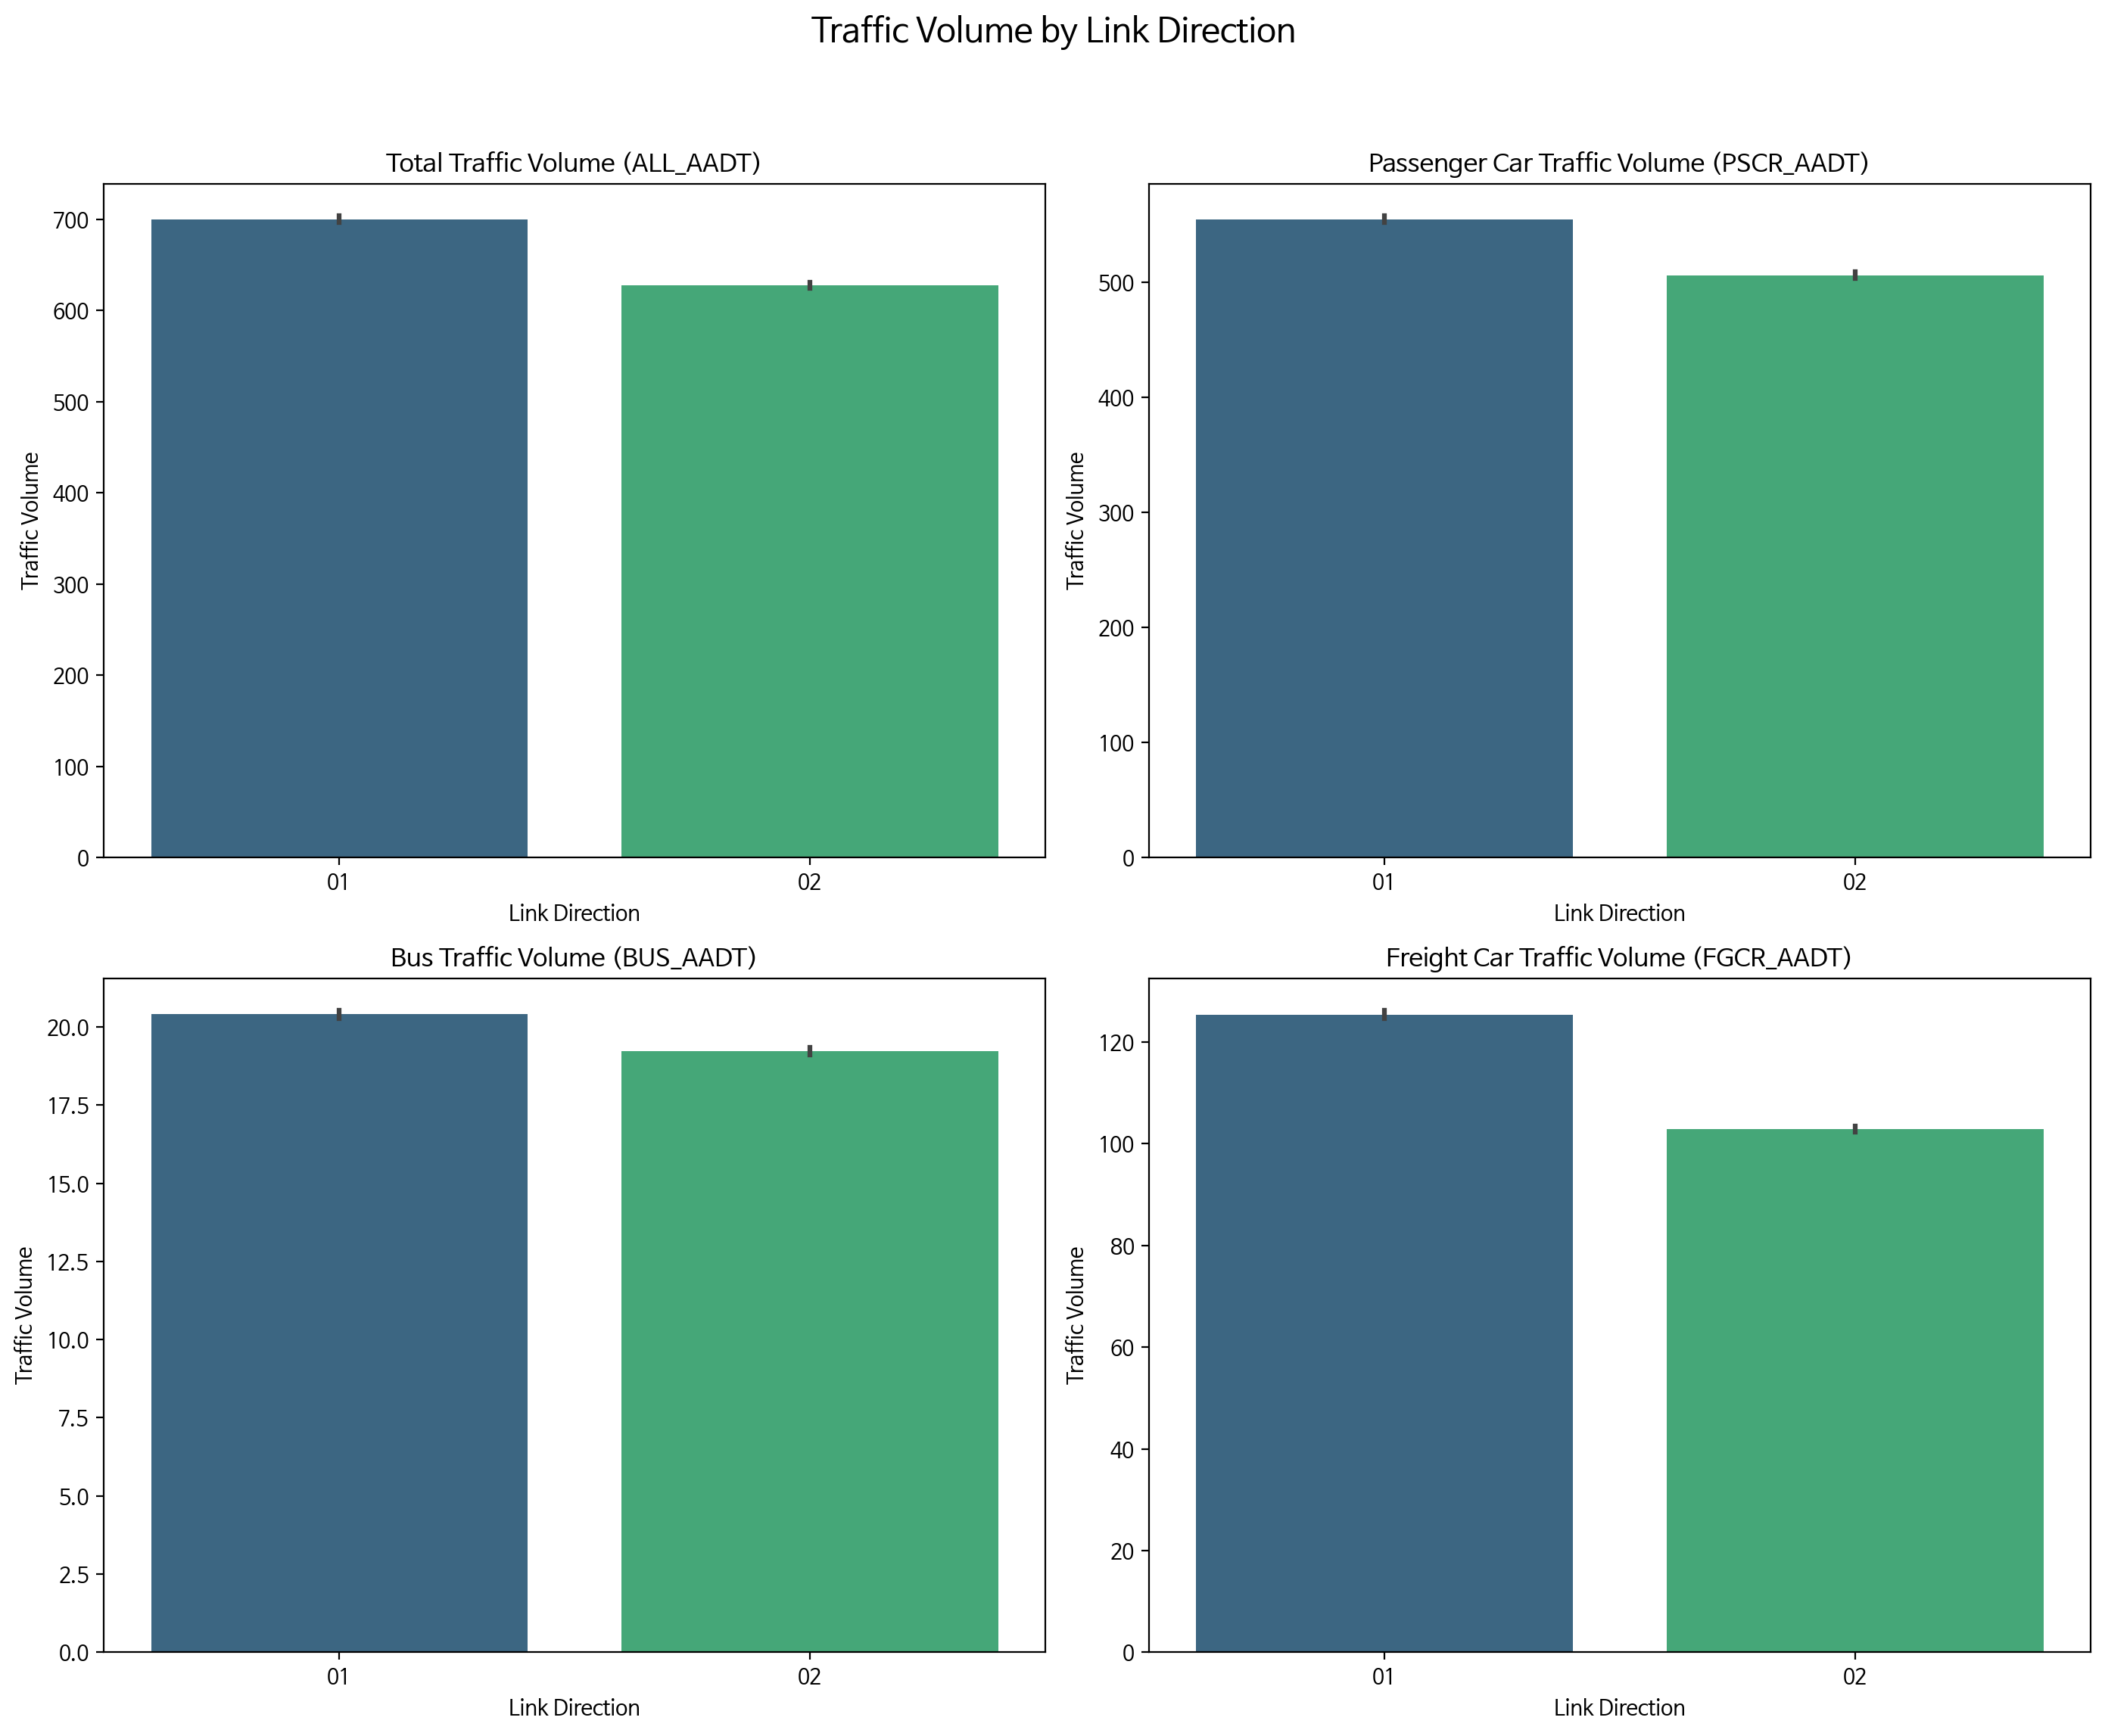

In [ ]:
# link_direction 별로 교통량 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Traffic Volume by Link Direction', fontsize=16)

# ALL_AADT 전체 교통량
sns.barplot(x='link_direction', y='ALL_AADT', data=traffic, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Total Traffic Volume (ALL_AADT)')
axs[0, 0].set_xlabel('Link Direction')
axs[0, 0].set_ylabel('Traffic Volume')

# PSCR_AADT 승용차의 교통량
sns.barplot(x='link_direction', y='PSCR_AADT', data=traffic, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Passenger Car Traffic Volume (PSCR_AADT)')
axs[0, 1].set_xlabel('Link Direction')
axs[0, 1].set_ylabel('Traffic Volume')

# BUS_AADT 버스의 교통량
sns.barplot(x='link_direction', y='BUS_AADT', data=traffic, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Bus Traffic Volume (BUS_AADT)')
axs[1, 0].set_xlabel('Link Direction')
axs[1, 0].set_ylabel('Traffic Volume')

# FGCR_AADT 화물차의 교통량
sns.barplot(x='link_direction', y='FGCR_AADT', data=traffic, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Freight Car Traffic Volume (FGCR_AADT)')
axs[1, 1].set_xlabel('Link Direction')
axs[1, 1].set_ylabel('Traffic Volume')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 모든 교통량 지표에서 상행 방향 (01)이 하행 방향 (02)보다 더 많은 교통량을 보임
- 특히, 화물차 교통량에서 상행 방향과 하행 방향의 차이가 상대적으로 큼
- 승용차와 버스 교통량은 상행과 하행 간의 차이가 크지 않지만, 여전히 상행 방향이 약간 더 많은 경향이 있음




## 도로 등급
- 도로 등급 정보는 교통 계획, 경로 탐색, 도로 관리 등에 활용
- 101 : 고속도로 (장거리 고속 이동을 위한 주요 도로)
- 102 : 도시고속화도로 (도시 내부의 고속 이동을 위한 도로)
- 103 : 일반국도 (주요 도로와 보조 도로 사이의 역할)
- 104 : 특별/광역시도
- 105 : 국가지원지방도 (주요 도로와 보조 도로 사이의 역할)
- 106 : 지방도 (주요 도로와 보조 도로 사이의 역할)
- 107 : 시군도 (보조 도로)
- 108 : 기타 (특정 지역에서 중요한 역할을 할 수 있는 기타 도로)



In [ ]:
traffic['road_rank'].unique()

array([101, 103, 106, 107, 105, 102, 108])

In [ ]:
traffic['road_rank'].value_counts()

road_rank
107    2487578
103     331720
106     325414
105     157816
101      47839
108      25931
102       5922
Name: count, dtype: int64

<Axes: xlabel='road_rank'>

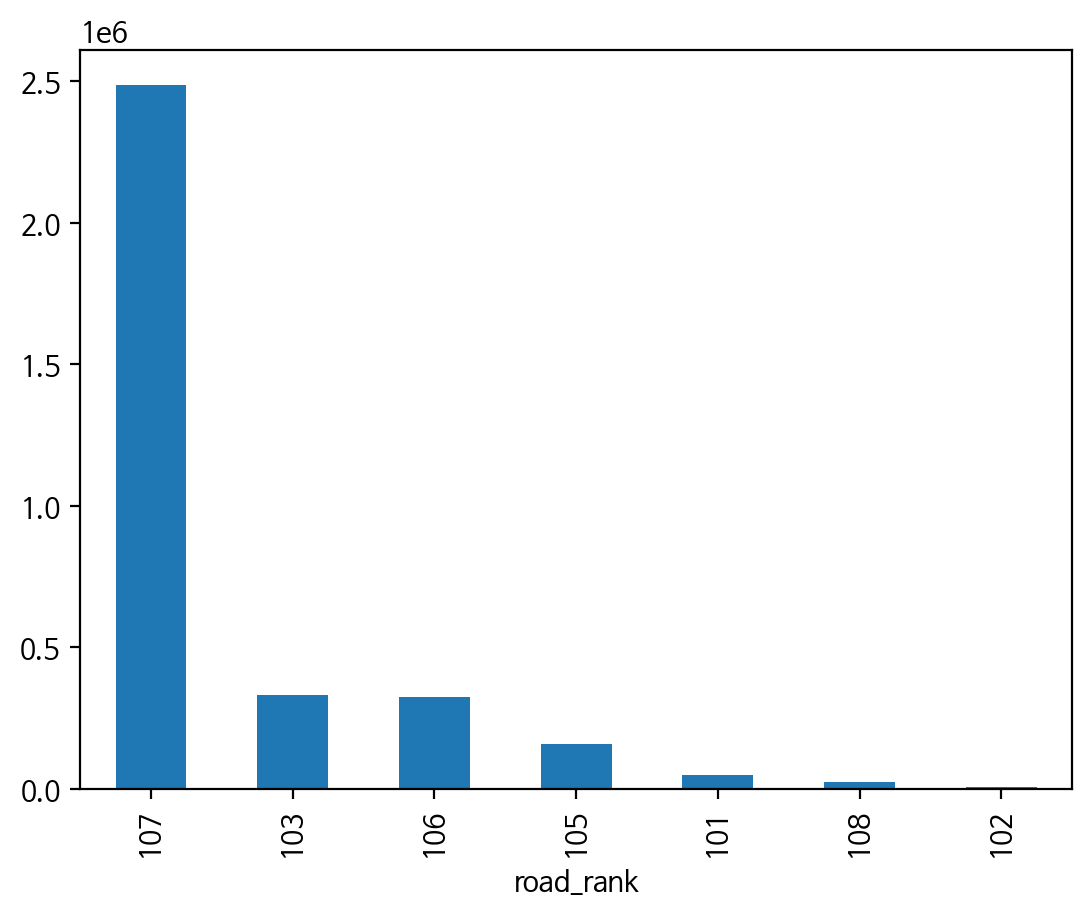

In [ ]:
traffic['road_rank'].value_counts().plot(kind='bar')

- 107 (시군도): 가장 빈도가 높은 도로 등급으로, 데이터 내에서 매우 많은 도로 구간이 이 등급에 해당됨
- 103 (일반국도), 106 (지방도), 105 (국가지원지방도): 상대적으로 빈도가 높은 도로 등급
- 101 (고속도로), 108 (기타), 102 (도시고속화도로): 빈도가 낮은 도로 등급

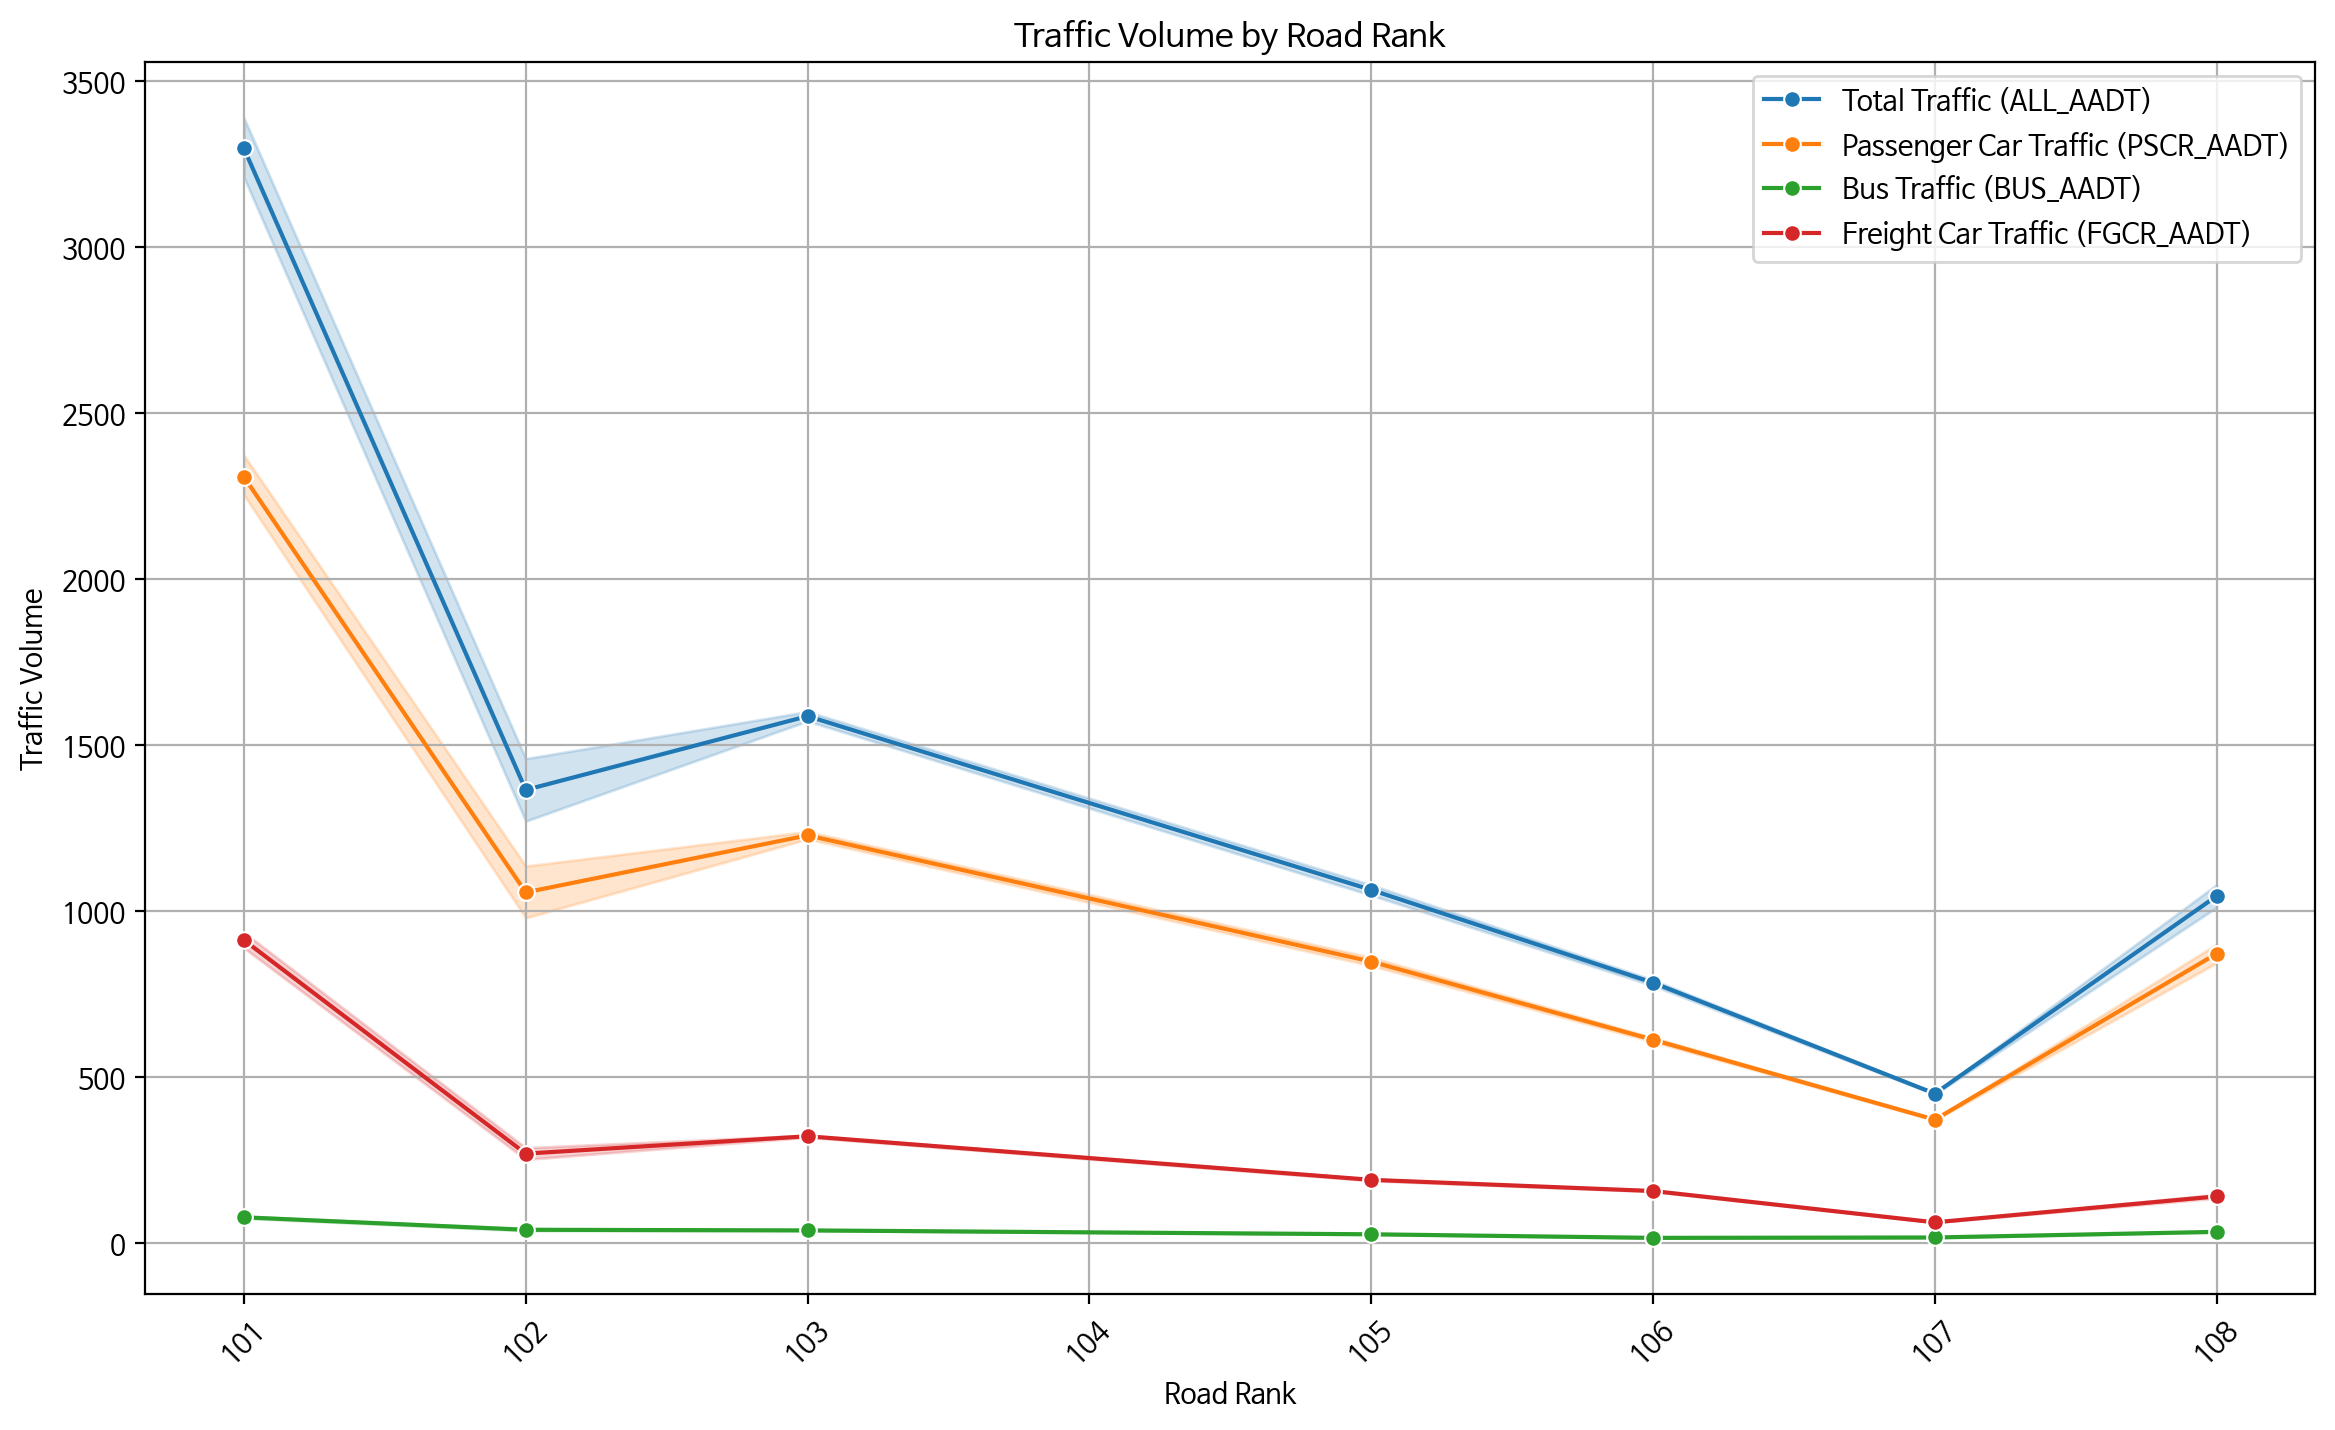

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='road_rank', y='ALL_AADT', data=traffic, marker='o', label='Total Traffic (ALL_AADT)')
sns.lineplot(x='road_rank', y='PSCR_AADT', data=traffic, marker='o', label='Passenger Car Traffic (PSCR_AADT)')
sns.lineplot(x='road_rank', y='BUS_AADT', data=traffic, marker='o', label='Bus Traffic (BUS_AADT)')
sns.lineplot(x='road_rank', y='FGCR_AADT', data=traffic, marker='o', label='Freight Car Traffic (FGCR_AADT)')

plt.title('Traffic Volume by Road Rank')
plt.xlabel('Road Rank')
plt.ylabel('Traffic Volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- 104(특별/광역시도): lineplot을 사용할 때 자동으로 도로 등급의 순서를 채워서 표시함
  - 104(특별/광역시도) 데이터 없음!

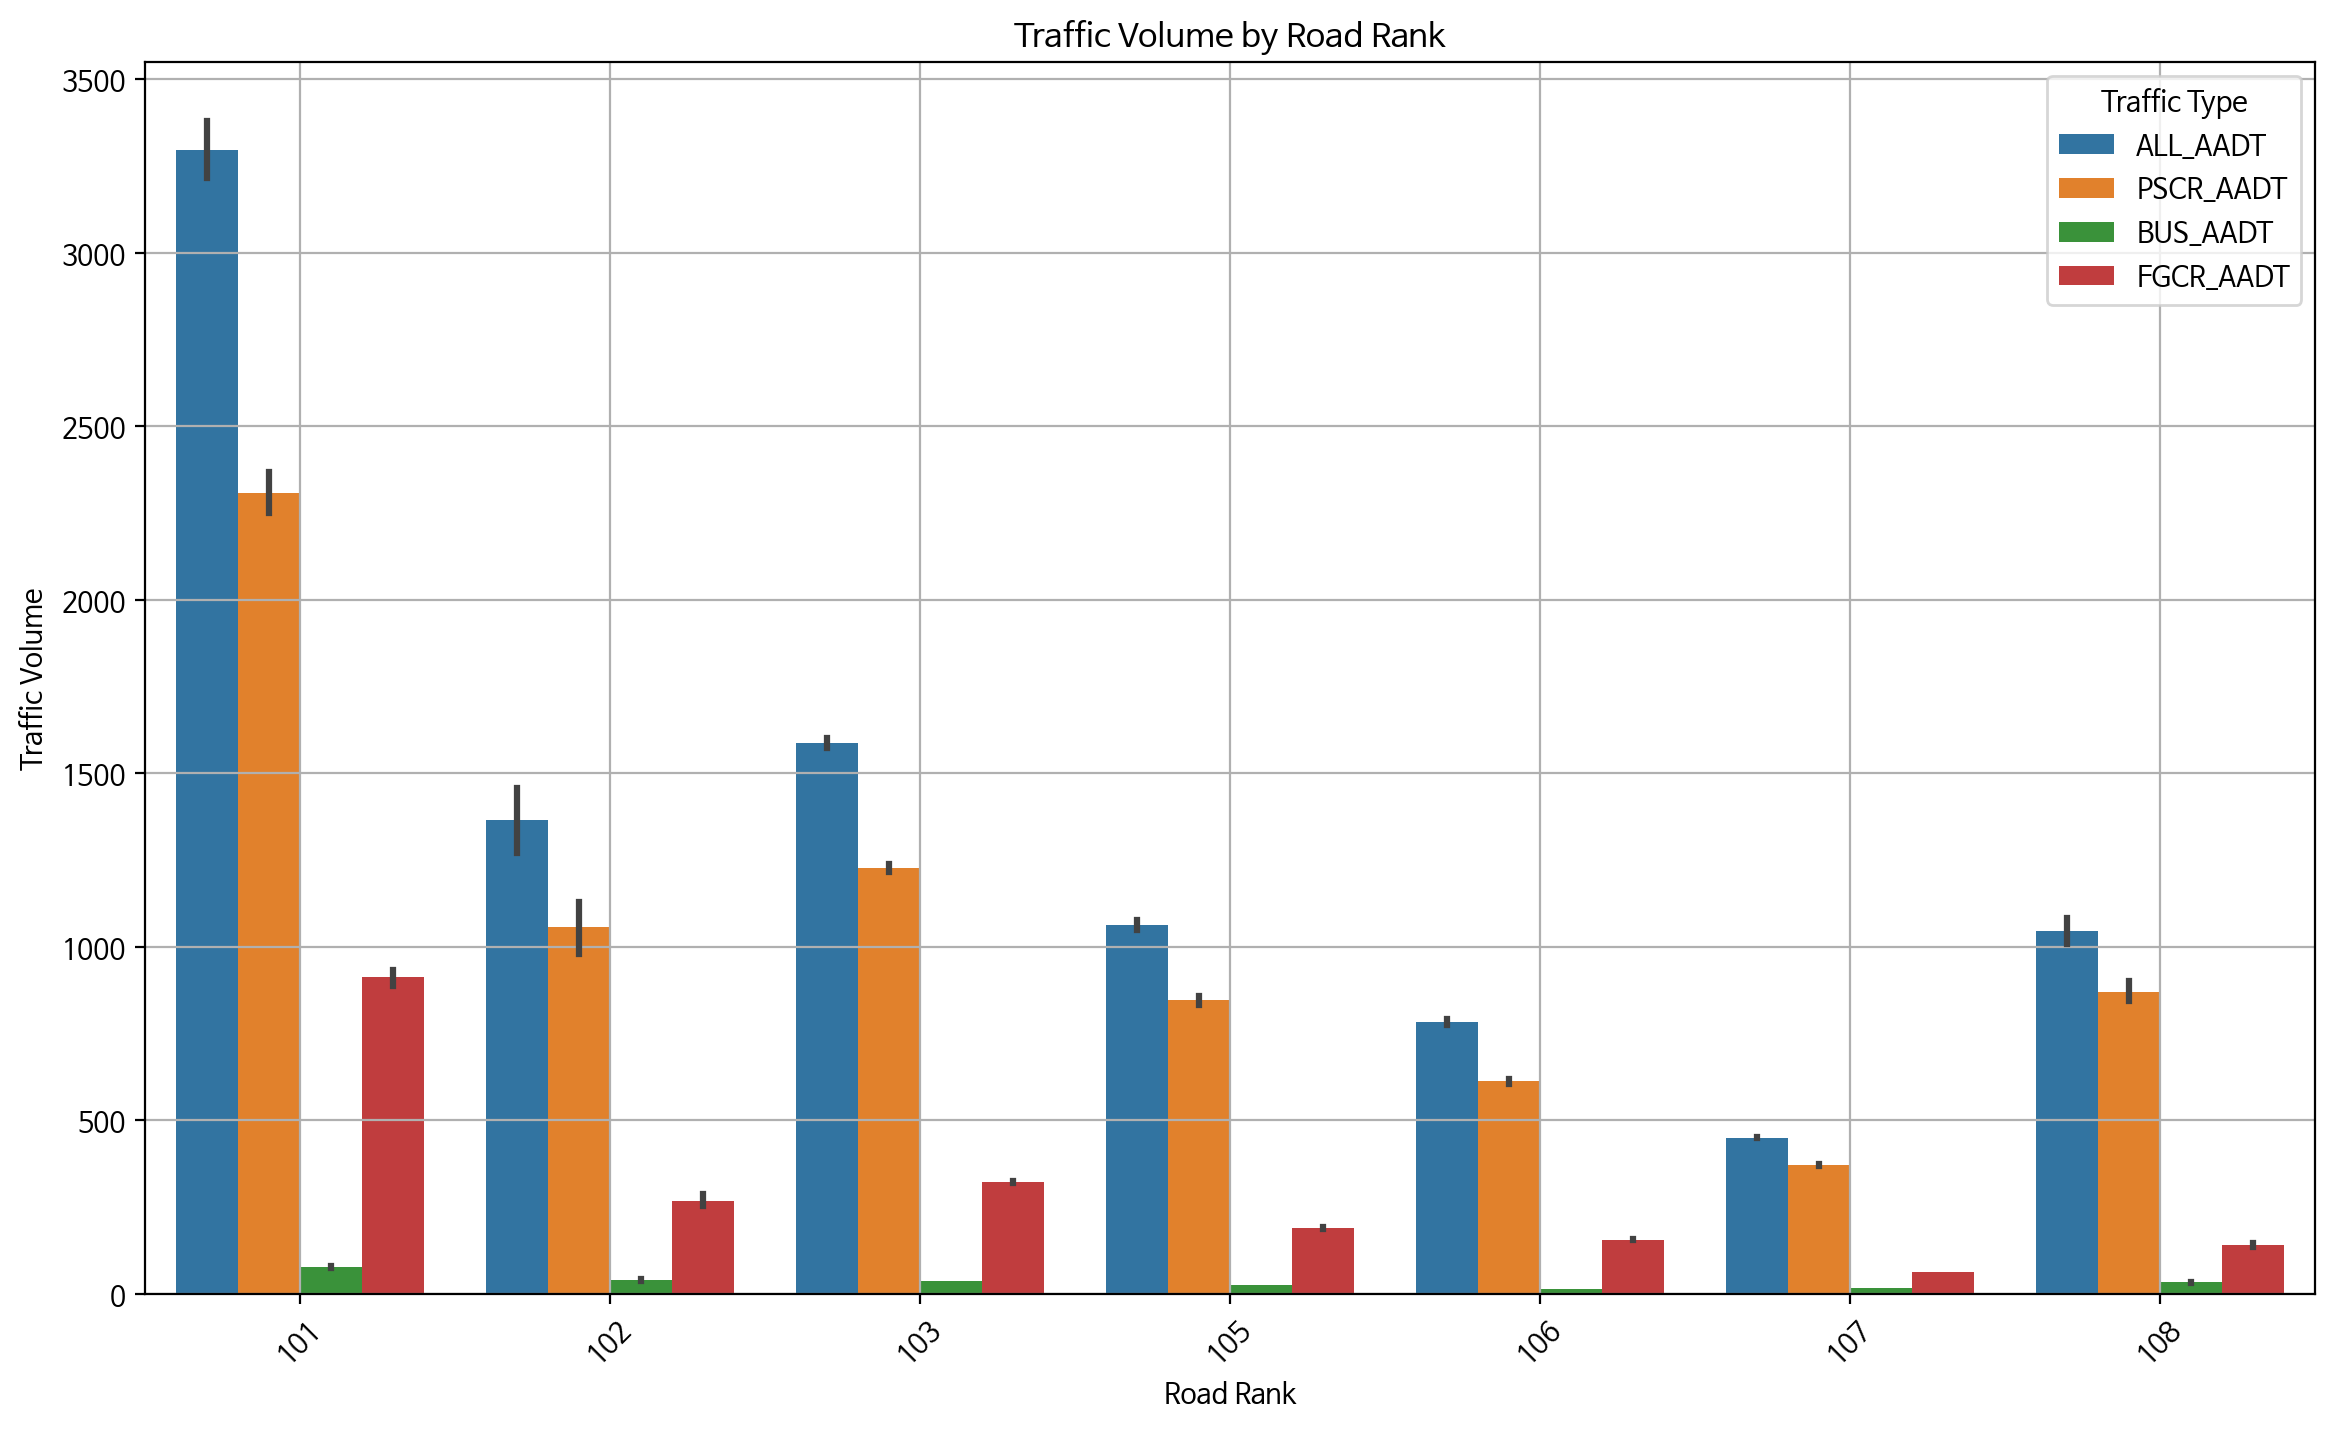

In [ ]:
traffic_melted = traffic.melt(id_vars=['road_rank'], value_vars=['ALL_AADT', 'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT'],
                              var_name='Traffic_Type', value_name='Traffic_Volume')

plt.figure(figsize=(14, 8))
sns.barplot(x='road_rank', y='Traffic_Volume', hue='Traffic_Type', data=traffic_melted)

plt.title('Traffic Volume by Road Rank')
plt.xlabel('Road Rank')
plt.ylabel('Traffic Volume')
plt.legend(title='Traffic Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- 공통적으로 **101(고속도로)**에서 높은 교통량을 보임
- **107 (시군도)**이 주로 보조 도로이거나 상대적으로 교통량이 적은 도로임
- 전반적으로 승용차>화물>버스 순으로 교통량이 많음
- 공통적으로 **101(고속도로)**에서 높은 교통량을 보임
- **107 (시군도)**은 위에서 가장 빈도가 높은 도로 등급였지만, 교통량이 적은 것으로 보아 주로 보조 도로로 예상됨


- 전반적으로 승용차>화물>버스 순으로 교통량이 많음
1. 승용차 교통량 (PSCR_AADT): 거의 모든 도로 등급에서 주요 교통량을 차지함.
  - 특히 101(고속도로)와 102(도시고속화도로)에서 높은 교통량을 보임
2. 총 교통량 (ALL_AADT): 도로 등급 101 (고속도로)에서 가장 높으며, 등급이 낮아질수록 교통량이 감소하는 경향이 있음.
  - 도로 등급 108 (기타)과 105 (국가지원지방도)와 비슷한 교통량을 보임
3. 화물차 교통량 (FGCR_AADT): 101(고속도로)와 102 (도시고속화도로)에서 비교적 높은 교통량을 보임
4. 버스 교통량 (BUS_AADT): 모든 도로 등급에서 거의 교통량이 없는 것으로 나타남

## 도로 길이
road_length  :  도로의 링크길이 정보

- 교통 흐름에 영향을 미침
- 긴 도로는 일반적으로 더 많은 차량들이 주행할 수 있고, 교통향 혼잡도에 영향을 미침
- 긴 도로일 수록 더 많은 유지보수 작업과 자원이 필요함

In [ ]:
traffic['road_length'].value_counts()

road_length
0.028    36792
0.027    36045
0.032    35606
0.031    34975
0.029    34713
0.033    34671
0.034    34162
0.035    33785
0.025    32944
0.036    32837
0.044    32317
0.026    31866
0.030    31862
0.037    31410
0.022    30125
0.024    30073
0.023    29938
0.021    29394
0.041    29312
0.038    29094
0.043    28931
0.040    28025
0.019    27333
0.039    26385
0.045    25516
0.046    25126
0.020    24904
0.042    24586
0.047    23340
0.017    22980
0.018    22645
0.014    22360
0.050    21979
0.015    21898
0.016    21795
0.051    21469
0.052    21405
0.049    20738
0.053    20538
0.048    20083
0.013    19359
0.054    18698
0.057    18239
0.012    18115
0.010    17733
0.009    17025
0.056    17015
0.062    16665
0.011    16421
0.007    16217
0.055    16153
0.060    16049
0.061    15586
0.008    15351
0.065    15320
0.059    15295
0.006    14977
0.066    14946
0.064    14778
0.005    14539
0.058    14006
0.068    13520
0.074    13411
0.069    13064
0.063    13057
0.084    1295

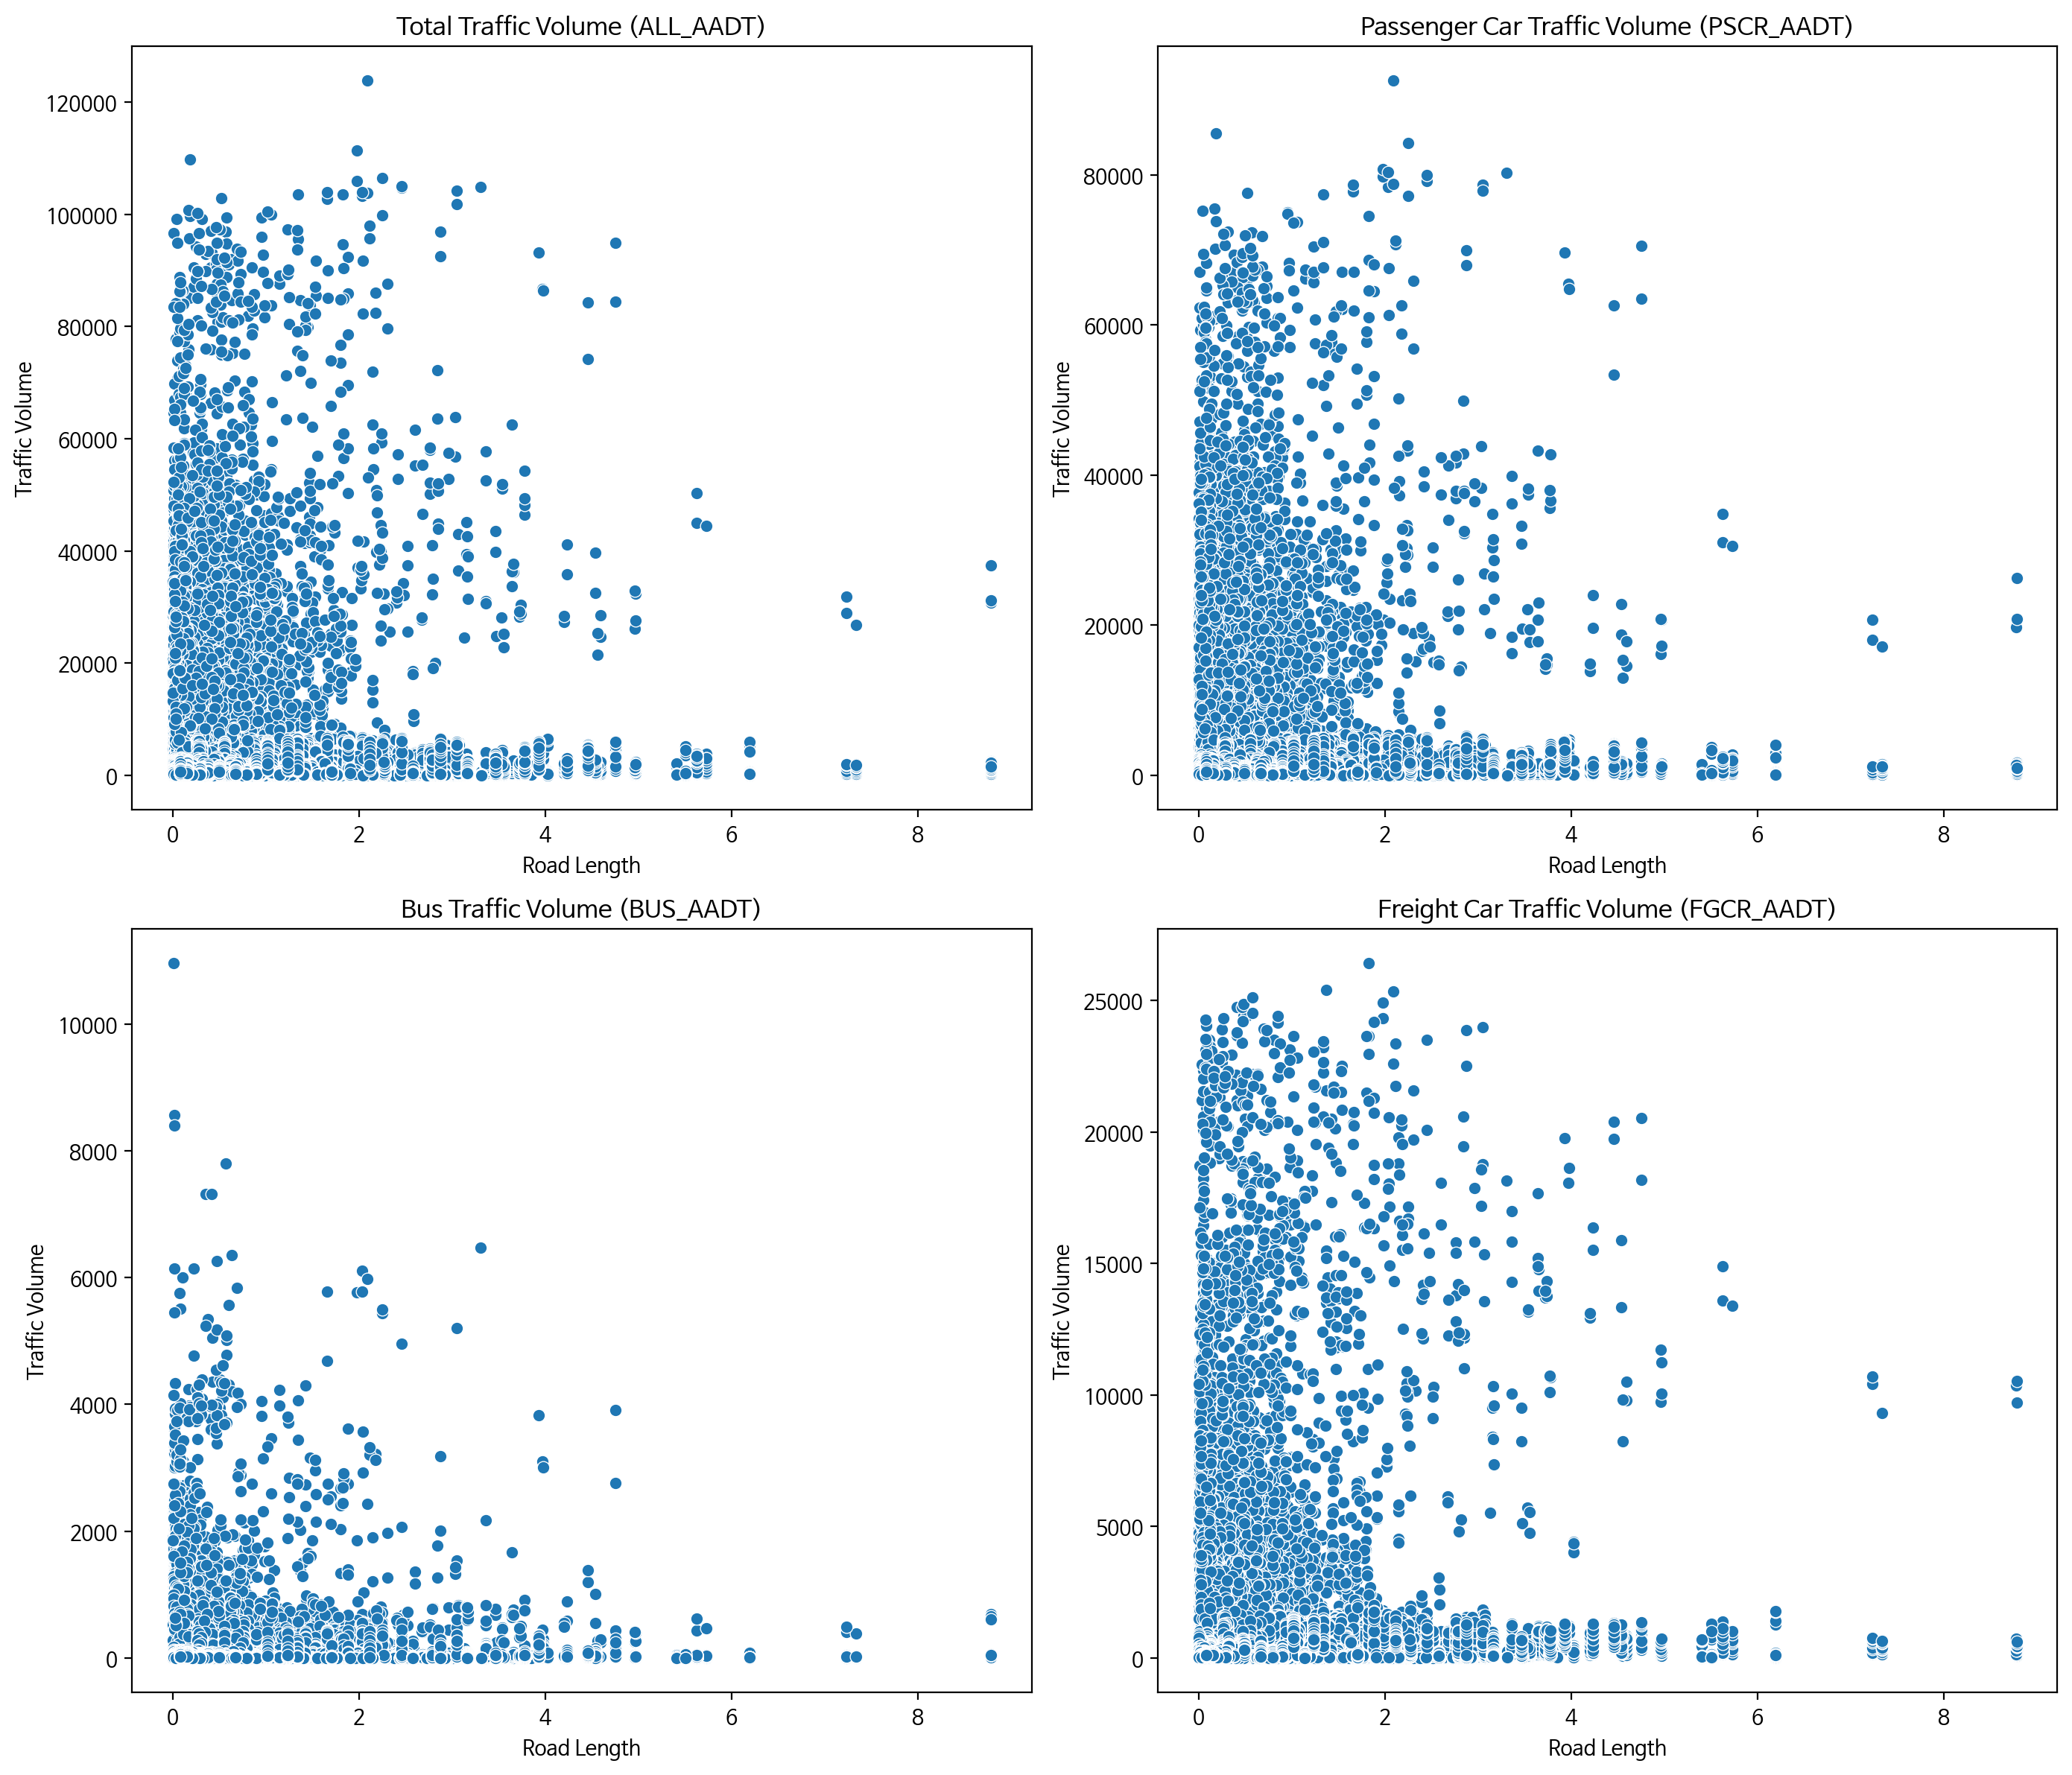

In [ ]:
# 도로 길이와 교통량 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# ALL_AADT 전체 교통량
sns.scatterplot(x='road_length', y='ALL_AADT', data=traffic, ax=axs[0, 0])
axs[0, 0].set_title('Total Traffic Volume (ALL_AADT)')
axs[0, 0].set_xlabel('Road Length')
axs[0, 0].set_ylabel('Traffic Volume')

# PSCR_AADT 승용차의 교통량
sns.scatterplot(x='road_length', y='PSCR_AADT', data=traffic, ax=axs[0, 1])
axs[0, 1].set_title('Passenger Car Traffic Volume (PSCR_AADT)')
axs[0, 1].set_xlabel('Road Length')
axs[0, 1].set_ylabel('Traffic Volume')

# BUS_AADT 버스의 교통량
sns.scatterplot(x='road_length', y='BUS_AADT', data=traffic, ax=axs[1, 0])
axs[1, 0].set_title('Bus Traffic Volume (BUS_AADT)')
axs[1, 0].set_xlabel('Road Length')
axs[1, 0].set_ylabel('Traffic Volume')

# FGCR_AADT 화물차의 교통량
sns.scatterplot(x='road_length', y='FGCR_AADT', data=traffic, ax=axs[1, 1])
axs[1, 1].set_title('Freight Car Traffic Volume (FGCR_AADT)')
axs[1, 1].set_xlabel('Road Length')
axs[1, 1].set_ylabel('Traffic Volume')

plt.tight_layout()
plt.show()

- 모든 유형의 교통량이 도로 길이가 짧을수록 높고, 길이가 길어질수록 감소하는 경향을 보임
- 짧은 도로 구간이 교통량을 더 많이 처리하는 특징을 보임
- 짧은 도로 구간이 높은 교통량을 처리하기 때문에, 이러한 구간에서의 도로 설계 및 관리가 중요함. 교통 혼잡을 줄이기 위해 짧은 도로 구간에 대한 추가적인 관리가 필요해 보임

## 도로명

In [ ]:
traffic['road_nm'].value_counts().sort_values(ascending=False)

road_nm
서동대로                75322
경기대로                53444
서해로                 43148
포승향남로               31714
중부대로                29530
백옥대로                29461
남북대로                27209
삼천병마로               27141
청원로                 25376
화성로                 25190
용구대로                25160
시청로                 20674
포은대로                20293
동부대로                20235
안성맞춤대로              19220
평남로                 18351
경기동로                18109
효행로                 17911
죽양대로                17365
푸른들판로               15510
3.1만세로              15183
발안로                 14992
평택제천고속도로            14662
동탄기흥로               14571
남부대로                14490
남양로                 13545
만세로                 13022
안성대로                11522
서봉로                 11347
발안양감로               11104
주석로                 10846
버들로                 10669
수목원로                10250
동백죽전대로              10187
경부고속도로              10151
서해안고속도로             10115
만년로                  9852
포승장안로                9808
신수로 

<Axes: xlabel='road_nm'>

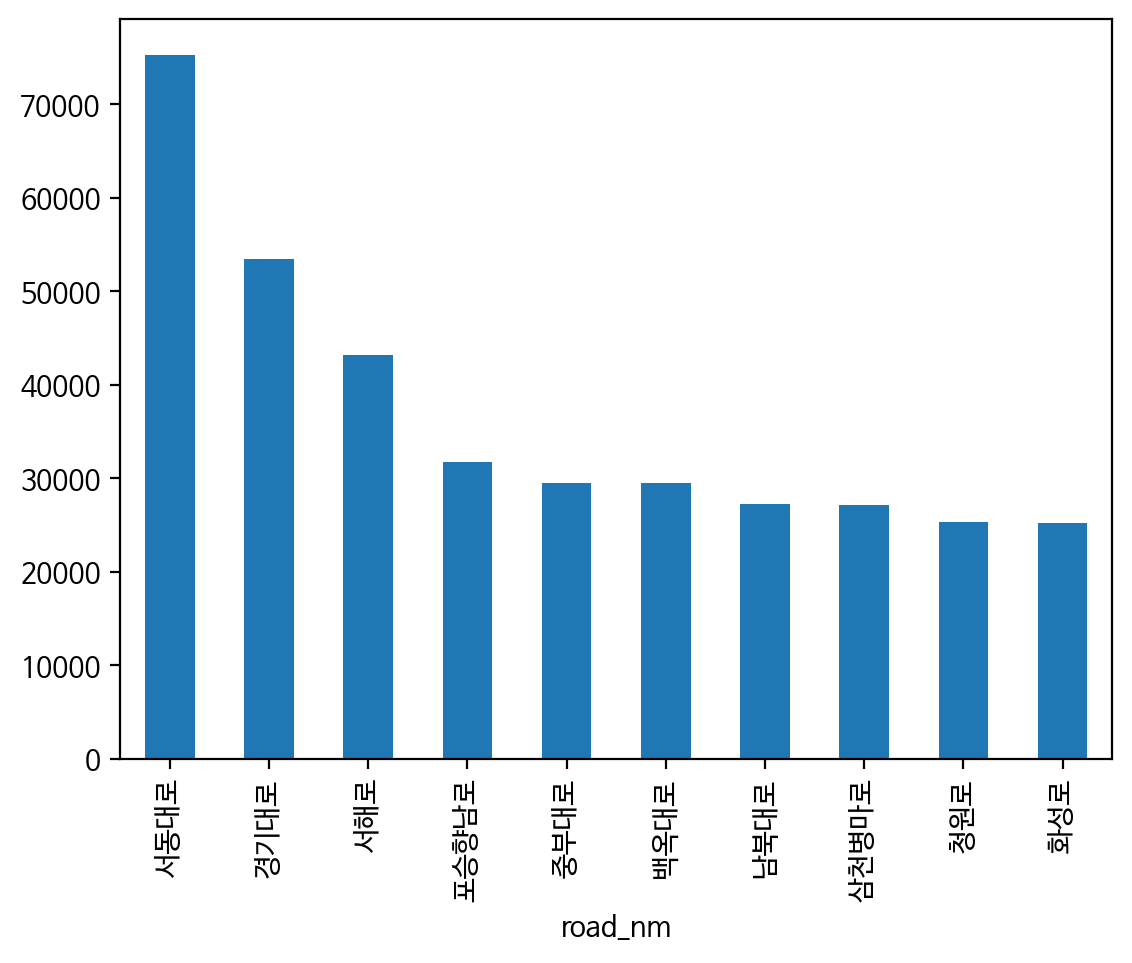

In [ ]:
traffic['road_nm'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

- 서동대로 갯수가 가장 많음

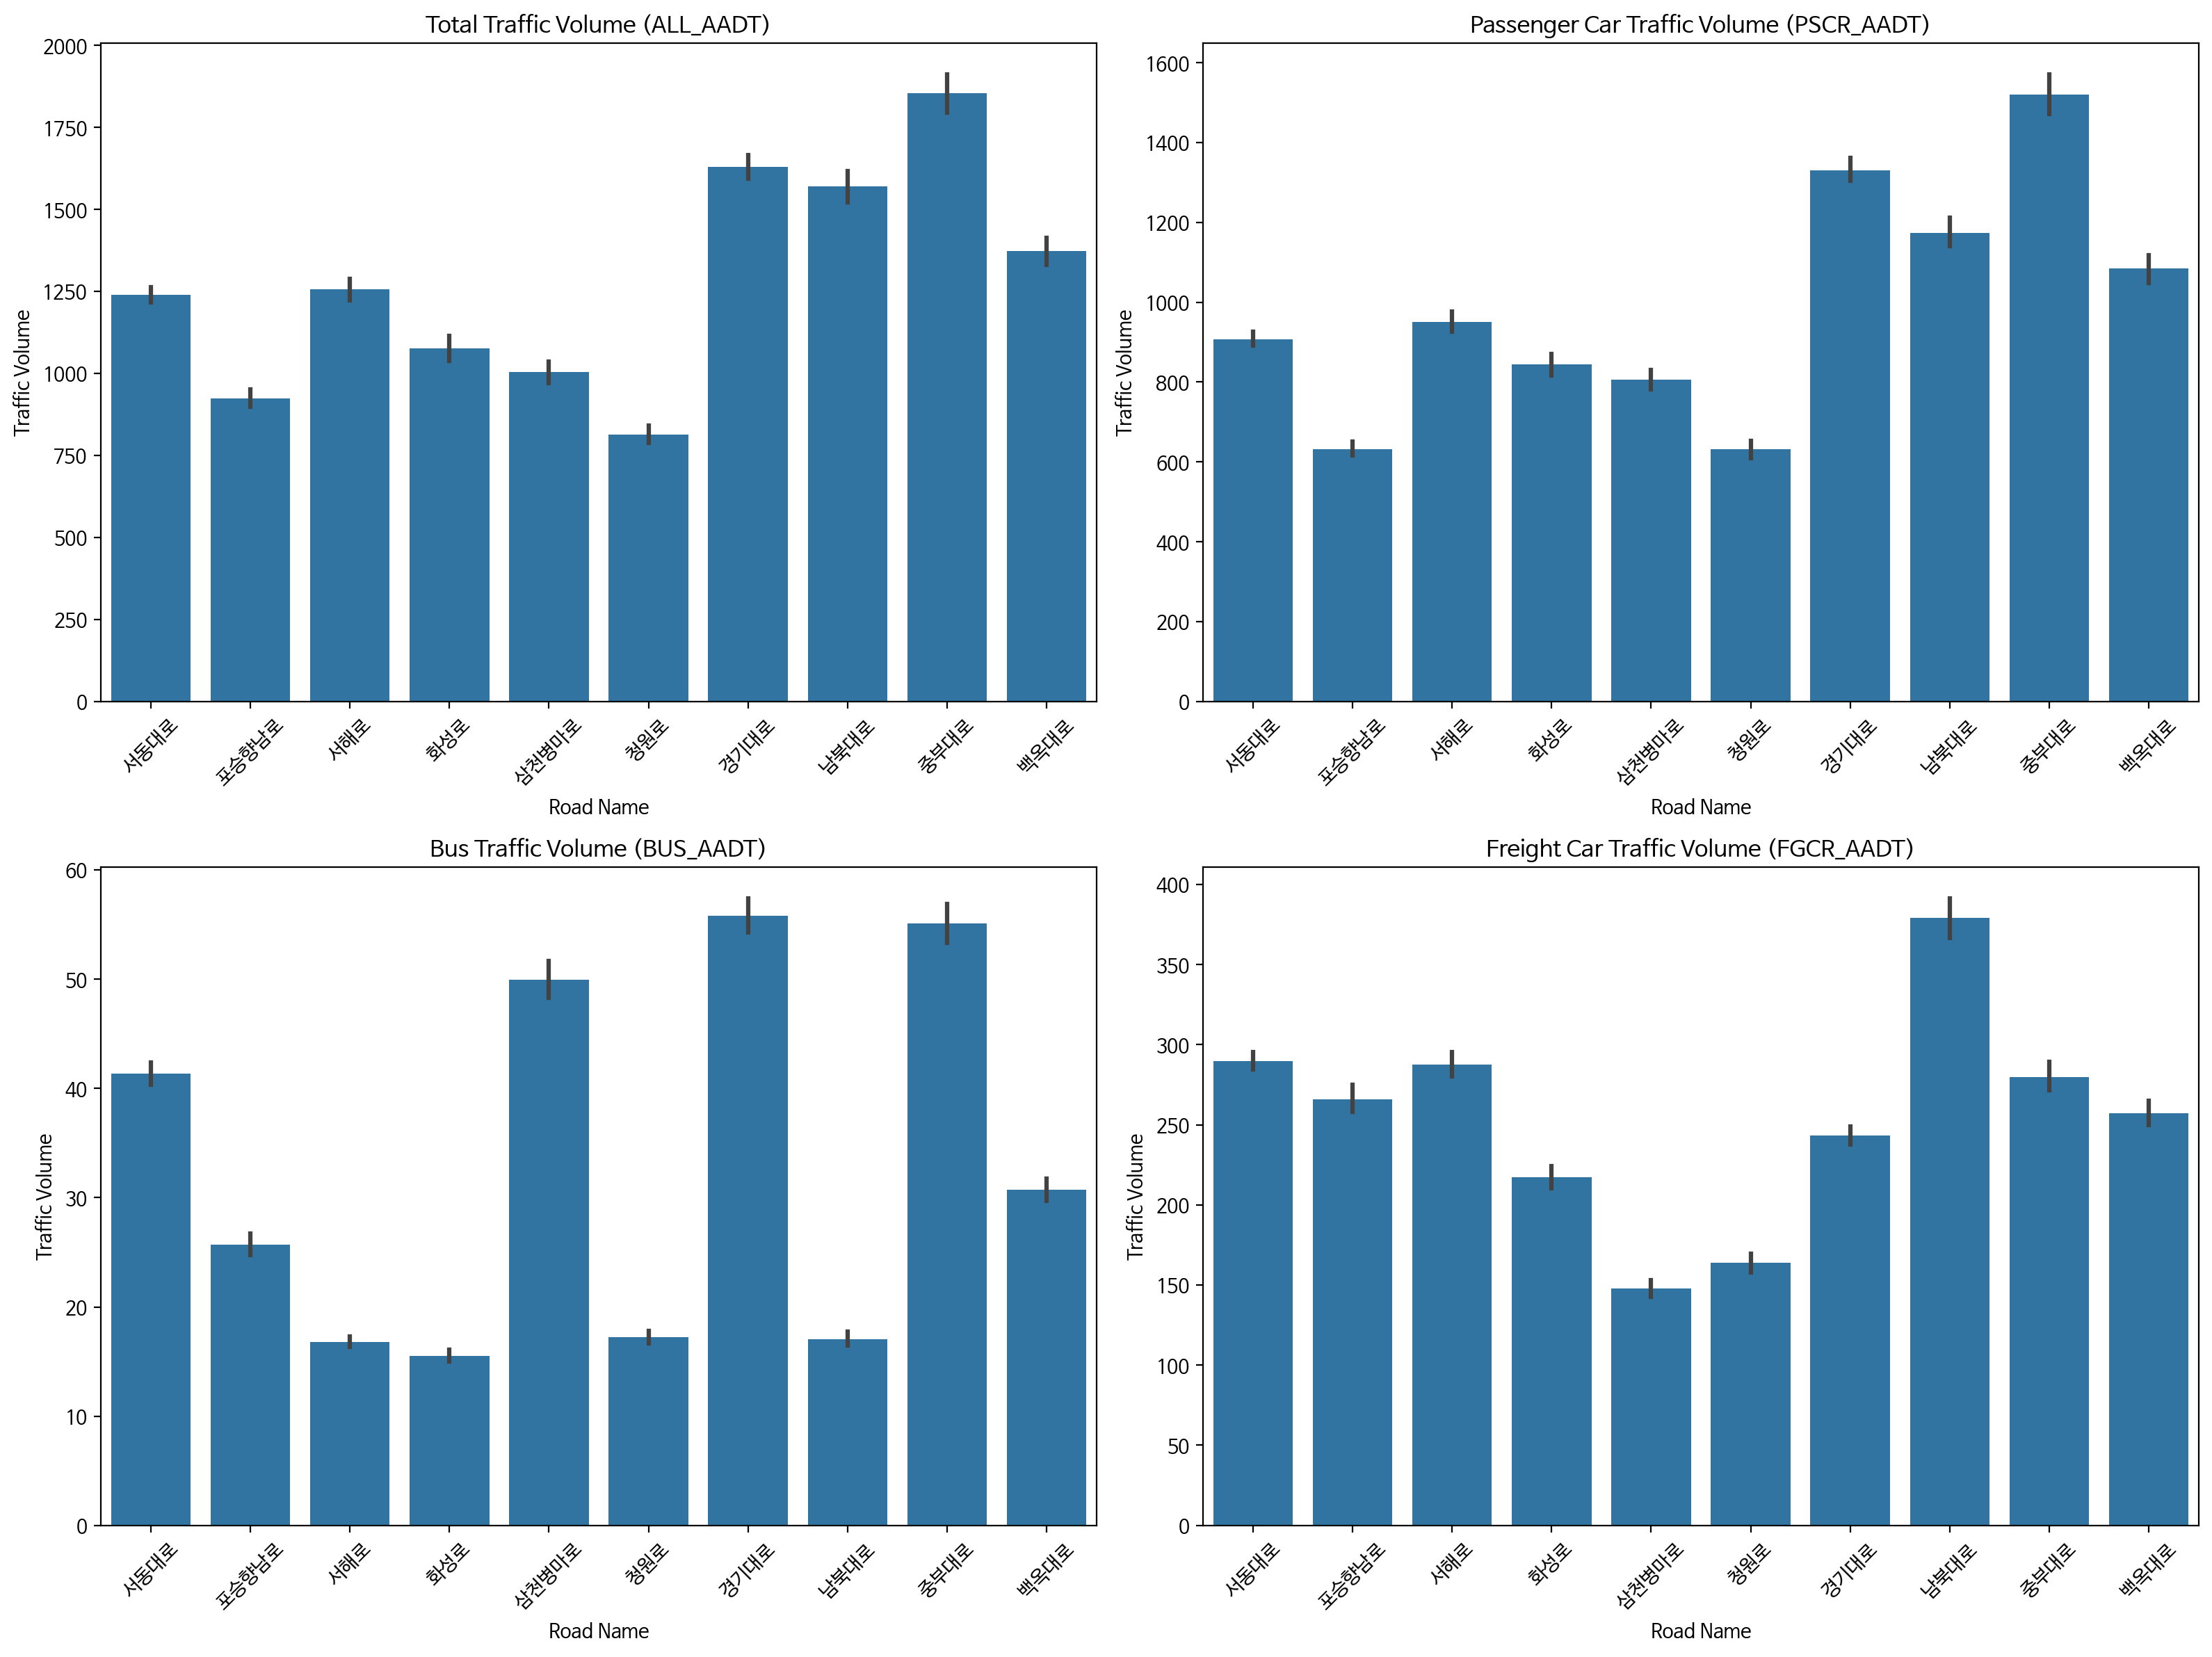

In [ ]:
# 상위 10개의 도로명 선택
top_10_roads = traffic['road_nm'].value_counts().nlargest(10).index
filtered_traffic = traffic[traffic['road_nm'].isin(top_10_roads)]

# 도로명별 교통량 시각화
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# ALL_AADT 전체 교통량
sns.barplot(x='road_nm', y='ALL_AADT', data=filtered_traffic, ax=axs[0, 0])
axs[0, 0].set_title('Total Traffic Volume (ALL_AADT)')
axs[0, 0].set_xlabel('Road Name')
axs[0, 0].set_ylabel('Traffic Volume')
axs[0, 0].tick_params(axis='x', rotation=45)

# PSCR_AADT 승용차의 교통량
sns.barplot(x='road_nm', y='PSCR_AADT', data=filtered_traffic, ax=axs[0, 1])
axs[0, 1].set_title('Passenger Car Traffic Volume (PSCR_AADT)')
axs[0, 1].set_xlabel('Road Name')
axs[0, 1].set_ylabel('Traffic Volume')
axs[0, 1].tick_params(axis='x', rotation=45)

# BUS_AADT 버스의 교통량
sns.barplot(x='road_nm', y='BUS_AADT', data=filtered_traffic, ax=axs[1, 0])
axs[1, 0].set_title('Bus Traffic Volume (BUS_AADT)')
axs[1, 0].set_xlabel('Road Name')
axs[1, 0].set_ylabel('Traffic Volume')
axs[1, 0].tick_params(axis='x', rotation=45)

# FGCR_AADT 화물차의 교통량
sns.barplot(x='road_nm', y='FGCR_AADT', data=filtered_traffic, ax=axs[1, 1])
axs[1, 1].set_title('Freight Car Traffic Volume (FGCR_AADT)')
axs[1, 1].set_xlabel('Road Name')
axs[1, 1].set_ylabel('Traffic Volume')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- 사임당로(지도에 안뜸?!)와 경기대로는 전반적으로 교통량이 높음
- 남부대로는 특히 화물차 교통량이 높아 물류나 화물 이동이 많은 구간일 가능성이 큼


1. ALL_AADT 전체 교통량
  - 중부대로, 경기대로, 남북대로에서 총 교통량이 상대적으로 높음
2. PSCR_AADT 승용차의 교통량
  - 마찬가지로, 중부대로, 경기대로, 남북대로에서 교통량이 높음
3. BUS_AADT 버스의 교통량
  - 경기대로, 중부대로, 삼천병마로에서 교통량이 높음
4. FGCR_AADT 화물차의 교통량
  - 남북대로가 가장 두드러짐


=> 지도에서 확인 필요

## 시도명

In [ ]:
traffic['sgg_nm'].value_counts()

sgg_nm
화성시        1152536
평택시         845823
안성시         325541
용인시 처인구     323891
용인시 기흥구     305777
오산시         236495
용인시 수지구     192157
Name: count, dtype: int64

<Axes: xlabel='sgg_nm'>

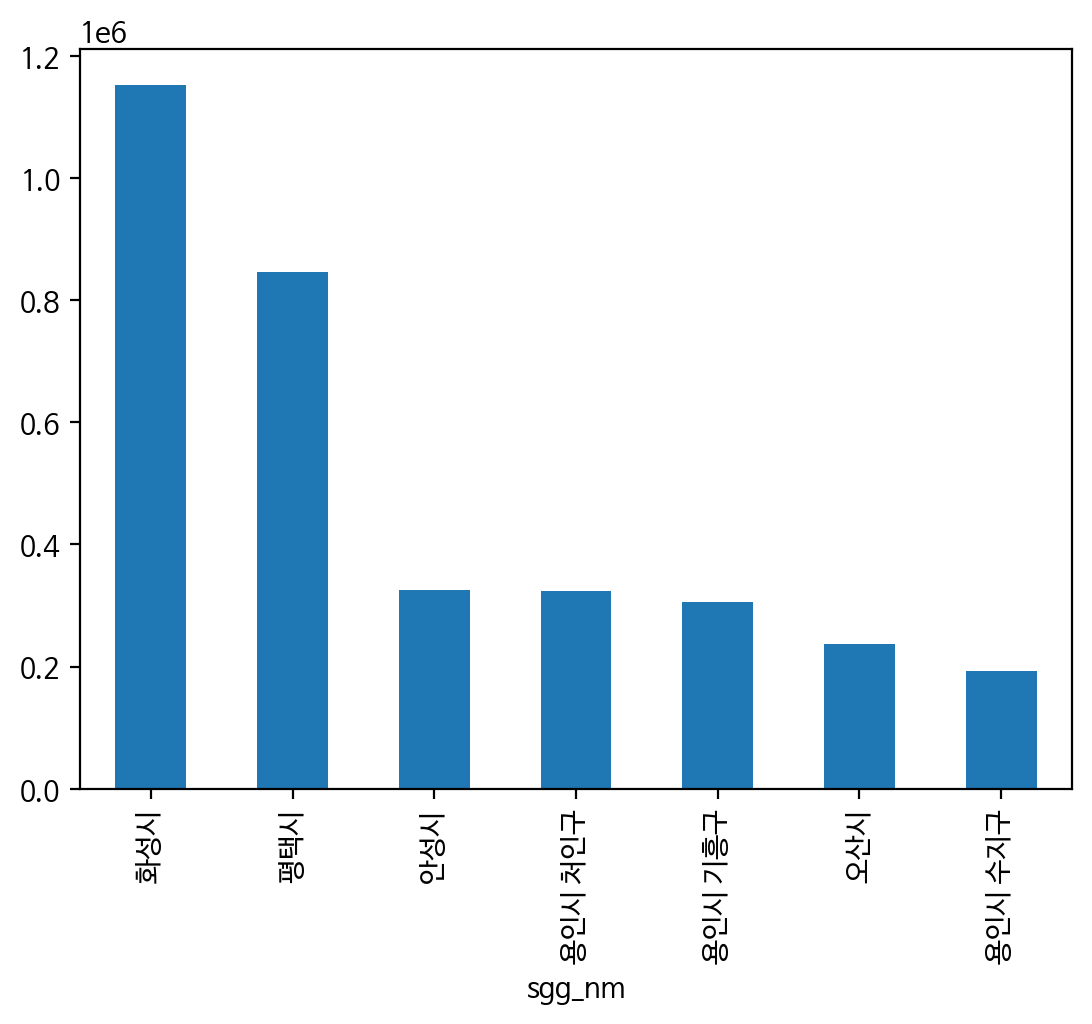

In [ ]:
traffic['sgg_nm'].value_counts().sort_values(ascending=False).plot(kind='bar')

- 안성시 데이터만 있는게 아니라 주변 시군구 데이터도 있음

## time slot
- 측정에 대한 시간적 범위 정보
- time frame을 구성하는 기본 단위 시간
- 하나의 time frame은 여러 개의 timeslot으로 구성
  - ex.TV 프로그램의 9PM 시간대가 하나의 timeslot

In [ ]:
# hour로 변환
traffic['hour'] = pd.to_datetime(traffic['timeslot'], format='%H', errors='coerce').dt.hour

In [ ]:
traffic.tail()

,year,link_id,road_rank,road_length,road_nm,sido_nm,sgg_nm,emd_nm,timeslot,ALL_AADT,PSCR_AADT,BUS_AADT,FGCR_AADT,link_direction,hour
3382215,2022,571241036,108,0.082,경부고속도로,경기도,오산시,대원동,21,974,833,35,106,01,21.0
3382216,2022,571210004,108,0.153,경부고속도로,경기도,오산시,대원동,22,577,456,20,101,01,22.0
3382217,2022,571241036,108,0.082,경부고속도로,경기도,오산시,대원동,22,844,721,27,96,01,22.0
3382218,2022,571210004,108,0.153,경부고속도로,경기도,오산시,대원동,23,423,306,19,98,01,23.0
3382219,2022,571241036,108,0.082,경부고속도로,경기도,오산시,대원동,23,620,494,21,104,01,23.0


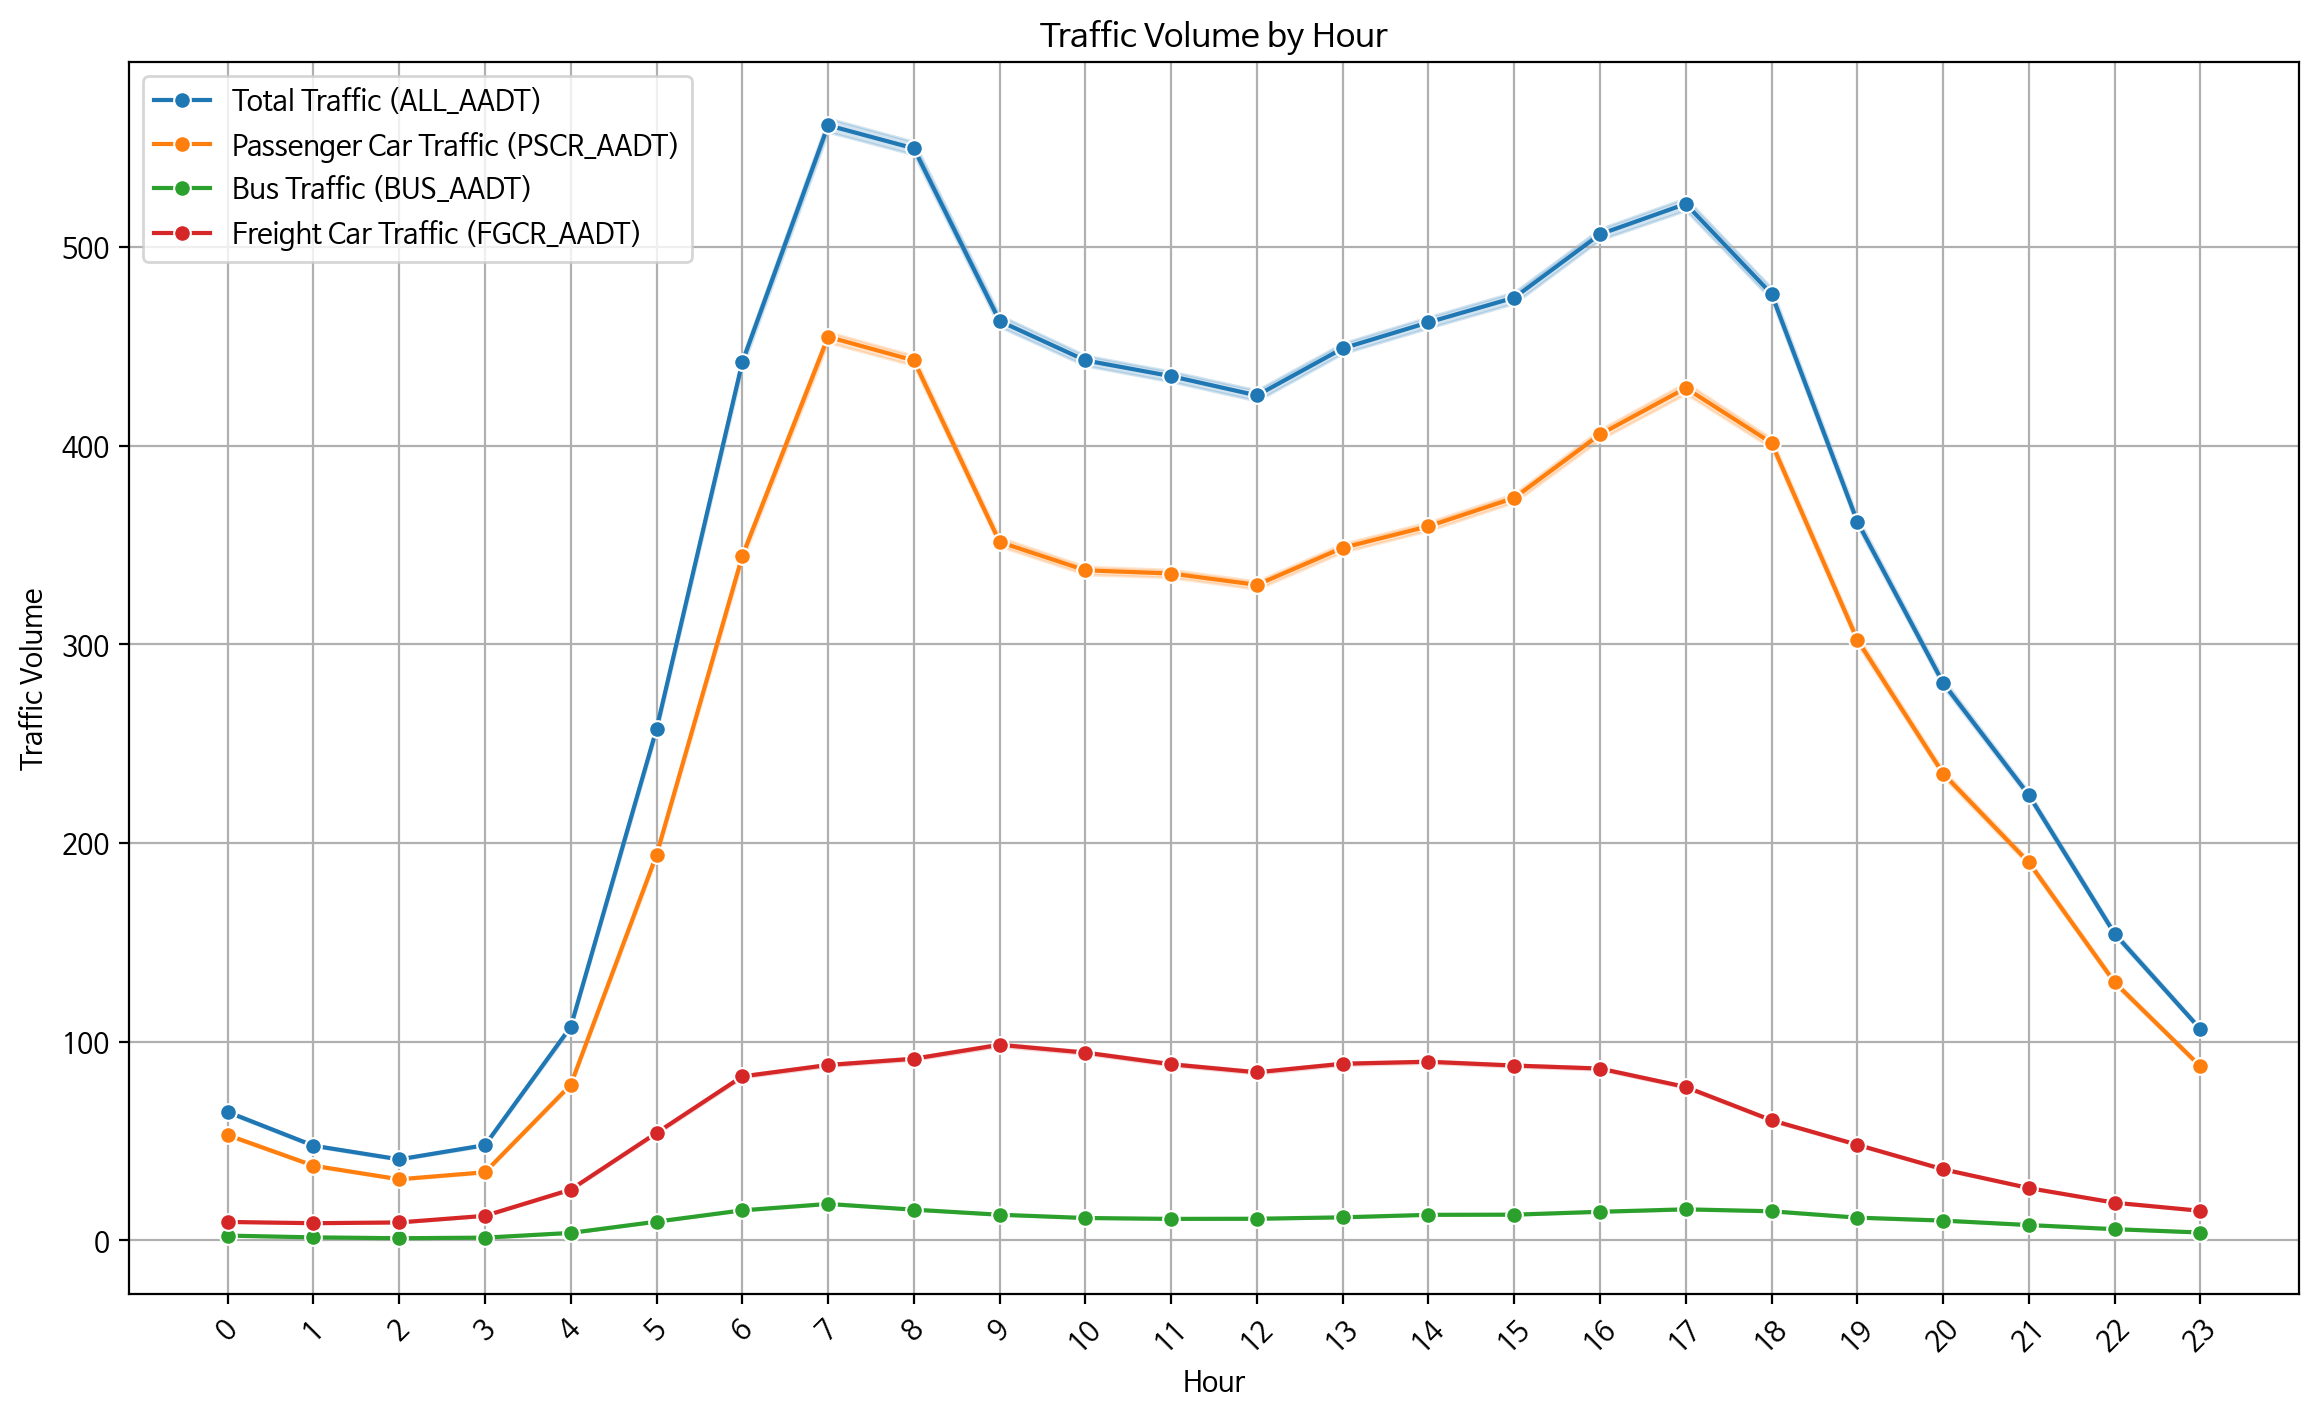

In [ ]:
# 시간별 총 교통량 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='ALL_AADT', data=traffic, marker='o', label='Total Traffic (ALL_AADT)')
sns.lineplot(x='hour', y='PSCR_AADT', data=traffic, marker='o', label='Passenger Car Traffic (PSCR_AADT)')
sns.lineplot(x='hour', y='BUS_AADT', data=traffic, marker='o', label='Bus Traffic (BUS_AADT)')
sns.lineplot(x='hour', y='FGCR_AADT', data=traffic, marker='o', label='Freight Car Traffic (FGCR_AADT)')

plt.title('Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.xticks(range(24), rotation=45)  # 0시부터 23시까지 x축에 표시
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. 총 교통량 (ALL_AADT):
- 피크 시간대: 7시에서 8시, 그리고 17시에서 18시 사이에 교통량이 가장 높음
  - 출퇴근 시간대에 교통량이 급증함
- 저조 시간대: 0시에서 4시 사이에는 교통량이 매우 낮음
2. 승용차 교통량 (PSCR_AADT)
- 총 교통량 (ALL_AADT)과 비슷
3. 버스 교통량 (BUS_AADT)
- 시간대별로 큰 변동 없음
4. 화물차 교통량 (FGCR_AADT)
- 다른 교통 유형에 비해 상대적으로 안정적

-> 시간대별 교통 패턴을 고려해야 됨!


# 2. 오산시_상세도로망.geojson

In [ ]:
road_network.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 105281 entries, 0 to 105280
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        105281 non-null  int64   
 1   link_id     105281 non-null  int64   
 2   max_speed   105281 non-null  int64   
 3   road_name   84658 non-null   object  
 4   road_no     105281 non-null  object  
 5   road_rank   105281 non-null  int64   
 6   link_type   105281 non-null  int64   
 7   pavement    105281 non-null  int64   
 8   road_type   105281 non-null  int64   
 9   facil_name  4357 non-null    object  
 10  up_lanes    105281 non-null  int64   
 11  dw_lanes    105281 non-null  int64   
 12  oneway      105281 non-null  int64   
 13  length      105281 non-null  float64 
 14  up_its_id   105281 non-null  int64   
 15  dw_its_id   105281 non-null  int64   
 16  geometry    105281 non-null  geometry
dtypes: float64(1), geometry(1), int64(12), object(3)
memory usa

In [ ]:
road_network.head()

,year,link_id,max_speed,road_name,road_no,road_rank,link_type,pavement,road_type,facil_name,up_lanes,dw_lanes,oneway,length,up_its_id,dw_its_id,geometry
0,2020,478344684,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,0,None,1,0,1,0.473,2230077800,0,"LINESTRING (126.99779 37.17385, 126.99790 37.17406, 126.99798 37.17430, 126.99805 37.17451, 126.99812 37.17465, 126.99821 37.17477, 126.99833 37.17489, 126.99846 37.17499, 126.99860 37.17507, 126.99876 37.17515, 126.99897 37.17521, 126.99914 37.17525, 126.99929 37.17526, 126.99944 37.17527, 126.99956 37.17526, 126.99968 37.17525, 126.99980 37.17523, 126.99993 37.17520, 127.00008 37.17517, 127.00021 37.17514, 127.00036 37.17509, 127.00061 37.17502, 127.00085 37.17495, 127.00105 37.17487, 127.00147 37.17471, 127.00193 37.17455)"
1,2020,478344686,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,0,None,2,0,1,0.607,2230077200,0,"LINESTRING (126.99779 37.17385, 126.99780 37.17394, 126.99780 37.17399, 126.99781 37.17405, 126.99786 37.17426, 126.99790 37.17440, 126.99799 37.17468, 126.99806 37.17488, 126.99813 37.17503, 126.99817 37.17511, 126.99822 37.17520, 126.99829 37.17532, 126.99840 37.17547, 126.99852 37.17561, 126.99882 37.17595, 126.99898 37.17614, 126.99909 37.17631, 126.99917 37.17645, 126.99924 37.17659, 126.99927 37.17672, 126.99929 37.17683, 126.99929 37.17698, 126.99928 37.17708, 126.99925 37.17719, 126.99922 37.17726, 126.99919 37.17735, 126.99914 37.17743, 126.99907 37.17754, 126.99899 37.17764, 126.99884 37.17777, 126.99871 37.17786, 126.99854 37.17795, 126.99839 37.17801, 126.99827 37.17805, 126.99814 37.17808, 126.99790 37.17813, 126.99773 37.17815, 126.99763 37.17816, 126.99749 37.17817)"
2,2020,478344690,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,0,None,1,0,1,0.383,2230077300,0,"LINESTRING (127.00104 37.18002, 127.00098 37.17999, 127.00043 37.17954, 127.00014 37.17932, 126.99997 37.17919, 126.99981 37.17908, 126.99966 37.17898, 126.99946 37.17886, 126.99931 37.17877, 126.99918 37.17869, 126.99908 37.17864, 126.99899 37.17859, 126.99890 37.17854, 126.99882 37.17851, 126.99873 37.17846, 126.99864 37.17843, 126.99857 37.17841, 126.99850 37.17838, 126.99842 37.17836, 126.99834 37.17834, 126.99826 37.17832, 126.99818 37.17831, 126.99810 37.17830, 126.99801 37.17828, 126.99790 37.17826, 126.99749 37.17817)"
3,2020,478344696,60,오산화성고속도로,171,108,2,0,0,None,1,0,1,0.489,2230077400,0,"LINESTRING (126.99614 37.17621, 126.99632 37.17610, 126.99654 37.17593, 126.99668 37.17582, 126.99680 37.17573, 126.99693 37.17563, 126.99705 37.17556, 126.99719 37.17548, 126.99734 37.17541, 126.99749 37.17535, 126.99765 37.17531, 126.99777 37.17529, 126.99790 37.17527, 126.99805 37.17526, 126.99812 37.17526, 126.99819 37.17526, 126.99832 37.17528, 126.99846 37.17530, 126.99862 37.17535, 126.99872 37.17539, 126.99883 37.17543, 126.99896 37.17549, 126.99906 37.17556, 126.99916 37.17564, 126.99924 37.17571, 126.99930 37.17579, 126.99937 37.17587, 126.99942 37.17596, 126.99948 37.17608, 126.99951 37.17616, 126.99954 37.17626, 126.99955 37.17635, 126.99956 37.17644, 126.99955 37.17655, 126.99954 37.17665, 126.99952 37.17677, 126.99951 37.17694, 126.99951 37.17703, 126.99952 37.17712)"
4,2020,478344700,40,오산화성고속도로,171,108,2,0,0,None,1,0,1,0.281,2230077700,0,"LINESTRING (126.99770 37.17692, 126.99758 37.17712, 126.99752 37.17724, 126.99750 37.17730, 126.99749 37.17736, 126.99748 37.17743, 126.99749 37.17750, 126.99751 37.17756, 126.99754 37.17761, 126.99757 37.17765, 126.99761 37.17770, 126.99766 37.17774, 126.99772 37.17778, 126.99778 37.17782, 126.99784 37.17784, 126.99790 37.17786, 126.99799 37.17787, 126.99807 37.17787, 126.99817 37.17787, 126.99826 37.17785, 126.99834 37.17782, 126.99840 37.17779, 126.99844 37.17777, 126.99848 37.17773, 126.99852 37.17770, 126.99855 37.17766, 126.99858 37.17761, 126.99859 37.17756, 126.99860 37.17752, 126.99860 37.17748, 126.99860 37.17742, 126.99859 37.17734, 126.99854 37.17717, 126.99845 37.17686)"


# 3. 오산시_도로명주소(도로).geojson

In [ ]:
street_addr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      1270 non-null   object  
 1   RDS_MAN_NO  1270 non-null   int64   
 2   RN          1270 non-null   object  
 3   RN_CD       1270 non-null   object  
 4   ENG_RN      1270 non-null   object  
 5   NTFC_DE     1270 non-null   object  
 6   WDR_RD_CD   1270 non-null   object  
 7   ROA_CLS_SE  1270 non-null   object  
 8   RDS_DPN_SE  1270 non-null   object  
 9   RBP_CN      1270 non-null   object  
 10  REP_CN      1270 non-null   object  
 11  ROAD_BT     1270 non-null   float64 
 12  ROAD_LT     1270 non-null   float64 
 13  BSI_INT     1270 non-null   object  
 14  ALWNC_RESN  1270 non-null   object  
 15  ALWNC_DE    1270 non-null   object  
 16  MVM_RES_CD  1229 non-null   object  
 17  MVMN_RESN   1193 non-null   object  
 18  MVMN_DE     1270 non-null   object  
 19

In [ ]:
street_addr.head()

,SIG_CD,RDS_MAN_NO,RN,RN_CD,ENG_RN,NTFC_DE,WDR_RD_CD,ROA_CLS_SE,RDS_DPN_SE,RBP_CN,REP_CN,ROAD_BT,ROAD_LT,BSI_INT,ALWNC_RESN,ALWNC_DE,MVM_RES_CD,MVMN_RESN,MVMN_DE,OPERT_DE,geometry
0,41370,6611,부원로19번길,4394162,Buwon-ro 19beon-gil,20030316,3,4,2,원동 60-8,원동 61-2,4.035,35.390,20,부원로의 시작점에서 190m 지점에서 왼쪽으로 분기하는 도로,20110311,12,도로구간변경,20030316,20230905154150,"LINESTRING (127.08688 37.14537, 127.08688 37.14537, 127.08722 37.14520)"
1,41370,5531,독산성로232번길,4394052,Doksanseong-ro 232beon-gil,20091106,3,4,2,지곶동 269-30,지곶동 480-7,6.625,110.713,20,"독산성로의 시작지점에서부터 약 2,320m지점에서 오른쪽으로 분기되는 도로",20090720,12,도로구간변경,20191125,20191125113902,"LINESTRING (127.02748 37.17516, 127.02748 37.17515, 127.02751 37.17509, 127.02765 37.17496, 127.02785 37.17471, 127.02801 37.17453, 127.02816 37.17447, 127.02829 37.17444)"
2,41370,4472,궐리사로29번길,4394024,Gwollisa-ro 29beon-gil,20091106,3,4,1,궐동 716-0,궐동 269-0,2.621,324.798,20,궐리사로의 시작지점에서부터 약 290m지점에서 왼쪽으로 분기되는 도로,20090720,12,None,20150817,20150817135154,"LINESTRING (127.05721 37.16135, 127.05722 37.16135, 127.05725 37.16138, 127.05777 37.16138, 127.05765 37.16164, 127.05765 37.16176, 127.05761 37.16179, 127.05762 37.16182, 127.05761 37.16192, 127.05757 37.16204, 127.05757 37.16212, 127.05761 37.16219, 127.05763 37.16229, 127.05755 37.16239, 127.05752 37.16241, 127.05749 37.16247, 127.05748 37.16251, 127.05743 37.16258, 127.05734 37.16260, 127.05726 37.16256, 127.05724 37.16253, 127.05732 37.16241, 127.05726 37.16242, 127.05706 37.16263, 127.05696 37.16263, 127.05683 37.16260, 127.05667 37.16249, 127.05656 37.16242, 127.05645 37.16238)"
3,41370,6171,서랑로,3198022,Seorang-ro,20091106,3,3,1,서랑동 374-29,서랑동 374-29,5.434,43.936,15,법정동명(서랑동)을 이용하여 서랑로로 명명,20090720,12,도로구간변경,20091106,20211110171959,"LINESTRING (127.00657 37.17267, 127.00657 37.17268, 127.00659 37.17272, 127.00662 37.17307)"
4,41370,5701,학서1로,3352880,Hakseo 1-ro,20200519,3,3,1,청학동 125-7,청학동 126-0,8.000,48.282,15,학서로 시작지점에서 첫 번째 분기되는 도로,20200519,12,도로구간변경,20200528,20200528190631,"LINESTRING (127.05158 37.15372, 127.05158 37.15327)"


In [ ]:
# 중심 좌표 설정 (오산시 중심 좌표)
center = [37.1492, 127.0772]

# 도로망 시각화
road_map = folium.Map(location=center, zoom_start=12)
folium.GeoJson(road_network).add_to(road_map)
# road_map.save('road_network.html')

# 교통사고 지리적 분포 시각화
accident_map = folium.Map(location=center, zoom_start=12)
folium.GeoJson(accident_history, name='Traffic Accidents').add_to(accident_map)
# accident_map.save('accident_history.html')

# 도로명 주소 시각화
street_map = folium.Map(location=center, zoom_start=12)
folium.GeoJson(street_addr).add_to(street_map)
# street_map.save('street_address.html')

# 결과 지도 표시
road_map

In [ ]:
accident_map

In [ ]:
street_map

# 6. 오산시_교통사고이력.geojson

In [ ]:
accident_history.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         4510 non-null   object  
 1   accnt_2020  4510 non-null   float64 
 2   accnt_2021  4510 non-null   float64 
 3   accnt_2022  4510 non-null   float64 
 4   geometry    4510 non-null   geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 176.3+ KB


# 8. 오산시_상권정보.csv

In [ ]:
commercial_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27121 entries, 0 to 27120
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   com_lc_cd     27121 non-null  object 
 1   com_lc_nm     27121 non-null  object 
 2   com_mc_cd     27121 non-null  object 
 3   com_mc_nm     27121 non-null  object 
 4   com_sc_cd     27121 non-null  object 
 5   com_sc_nm     27121 non-null  object 
 6   ksic_cd       25996 non-null  object 
 7   ksic_nm       25996 non-null  object 
 8   adb_emd_cd    27121 non-null  int64  
 9   adb_emd_nm    27121 non-null  object 
 10  road_address  27121 non-null  object 
 11  lon           27121 non-null  float64
 12  lat           27121 non-null  float64
 13  std_year      27121 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.9+ MB


In [ ]:
com = commercial_district.copy()

In [ ]:
# 결측치 개수 확인
missing_values = com.isnull().sum()
print(missing_values)

# 결측치 비율 확인
missing_percentage = (missing_values / len(com)) * 100
print(missing_percentage)

com_lc_cd          0
com_lc_nm          0
com_mc_cd          0
com_mc_nm          0
com_sc_cd          0
com_sc_nm          0
ksic_cd         1125
ksic_nm         1125
adb_emd_cd         0
adb_emd_nm         0
road_address       0
lon                0
lat                0
std_year           0
dtype: int64
com_lc_cd       0.000000
com_lc_nm       0.000000
com_mc_cd       0.000000
com_mc_nm       0.000000
com_sc_cd       0.000000
com_sc_nm       0.000000
ksic_cd         4.148077
ksic_nm         4.148077
adb_emd_cd      0.000000
adb_emd_nm      0.000000
road_address    0.000000
lon             0.000000
lat             0.000000
std_year        0.000000
dtype: float64


## 상권업종대분류명

<Axes: xlabel='com_lc_nm'>

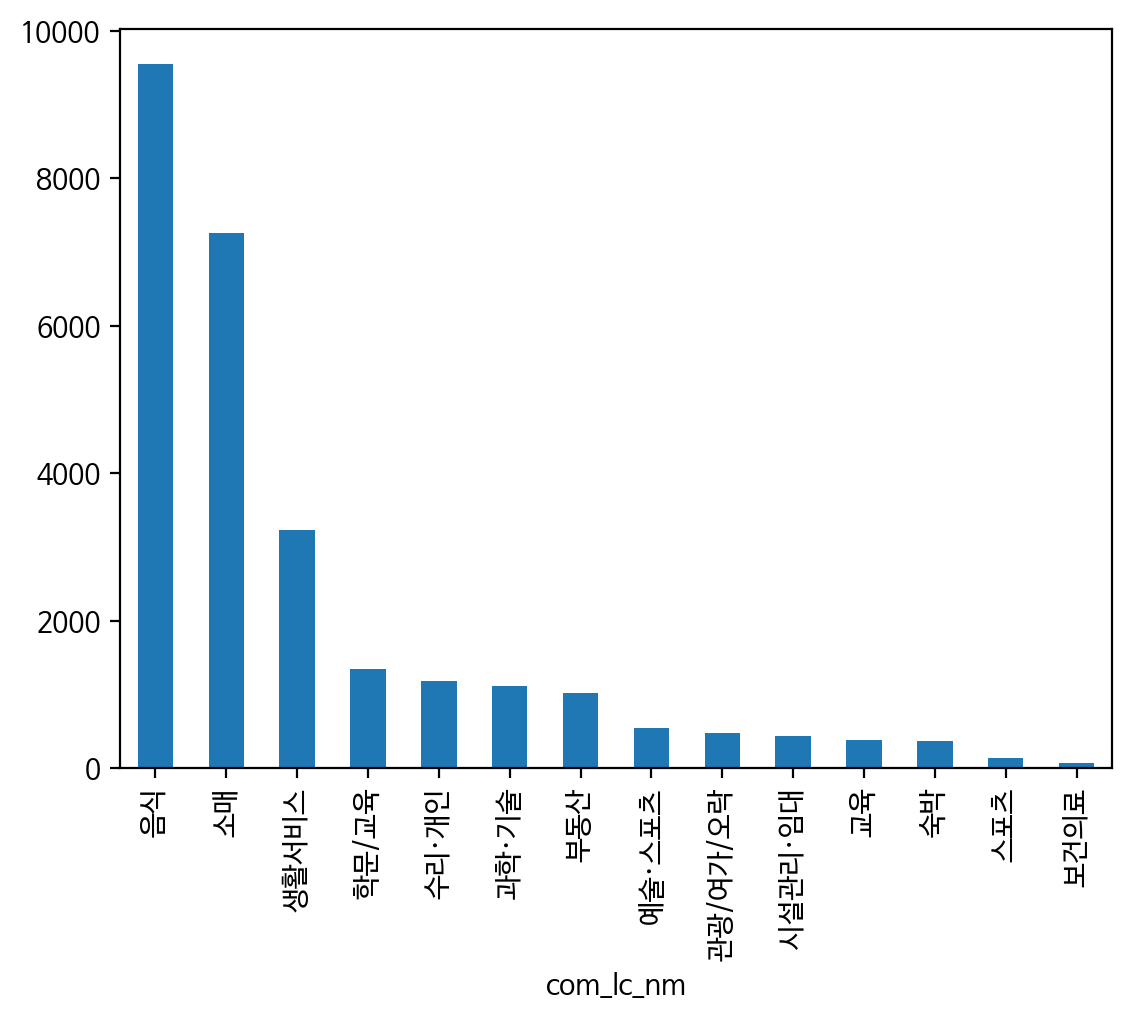

In [ ]:
com['com_lc_nm'].value_counts().plot(kind='bar')

## 상권업종중분류명

<Axes: xlabel='com_mc_nm'>

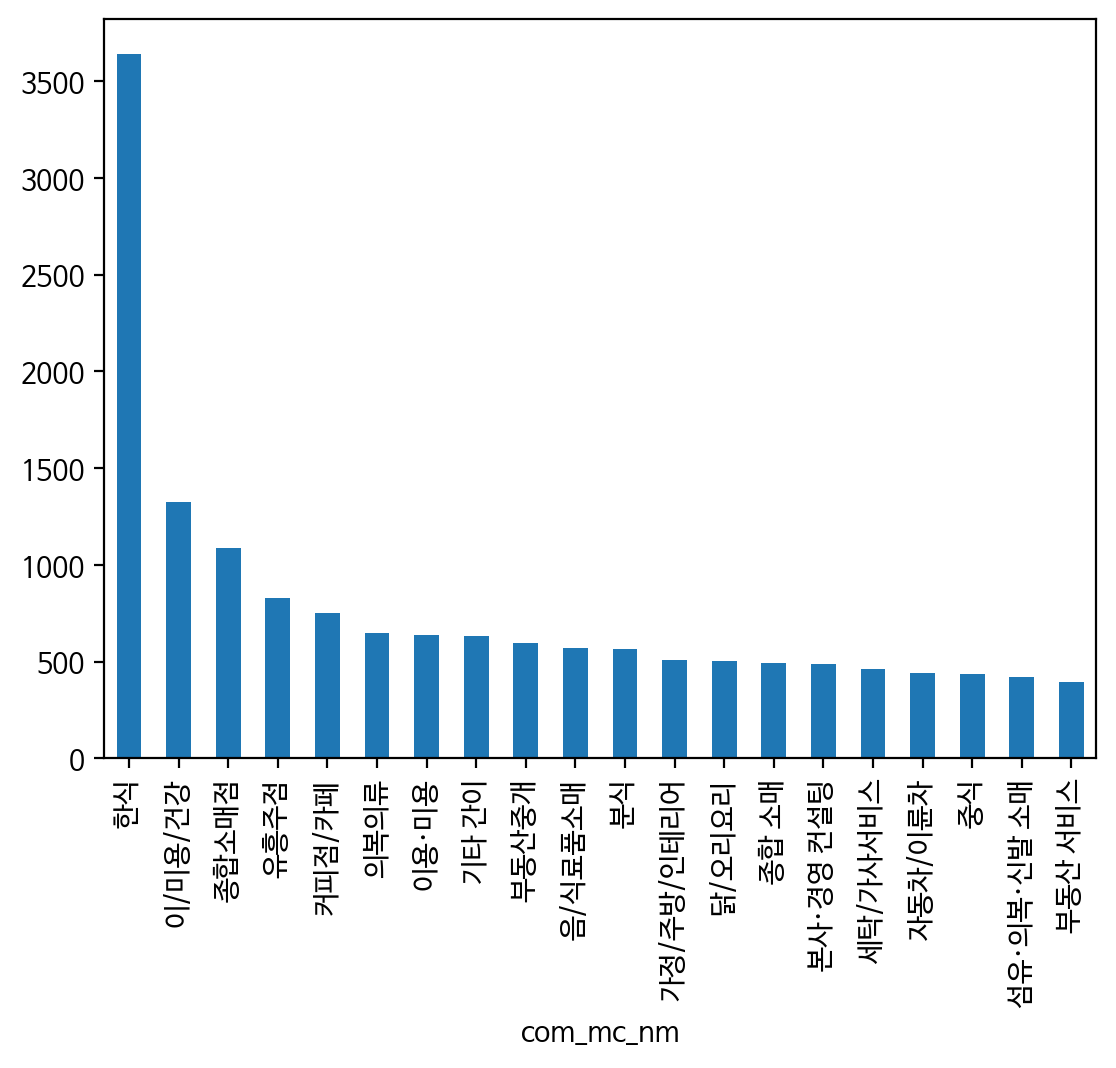

In [ ]:
com['com_mc_nm'].value_counts()[:20].plot(kind='bar')

## 상권업종소분류명

<Axes: xlabel='com_sc_nm'>

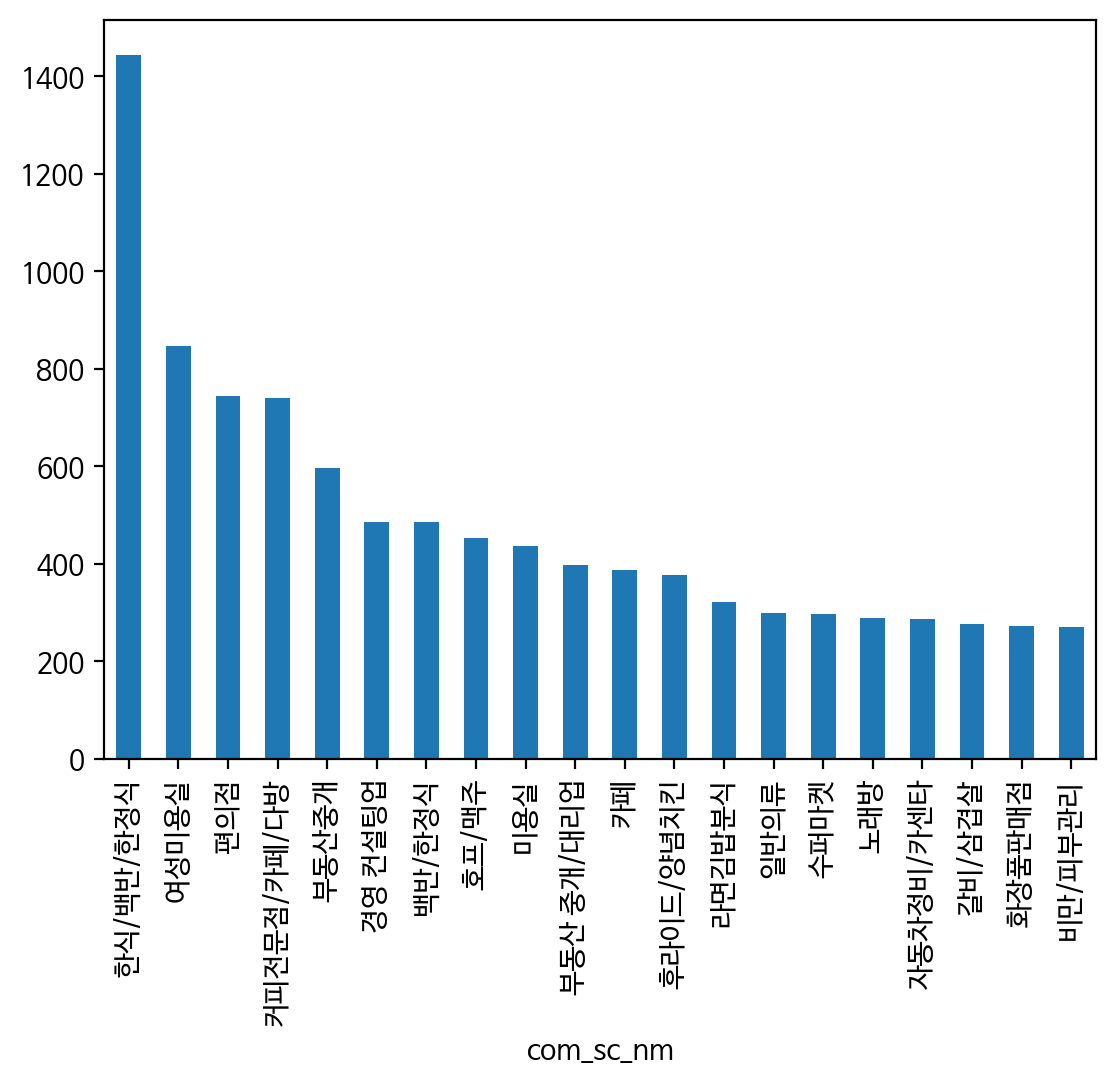

In [ ]:
com['com_sc_nm'].value_counts()[:20].plot(kind='bar')

## 표준산업분류명


### 표준산업분류명과 상권업종중분류명의 차이

- 표준산업분류명(KSIC): 통계청에서 정한 한국표준산업분류 코드
   - 국가 통계 작성 및 관리를 위해 사용
   - 산업 활동의 유사성 기준으로 분류함
   - 5자리 숫자로 구성
- 상권업종중분류명: 국세청에서 사업자등록 시 사용하는 업종분류코드
  - 세금 납부 및 관리를 위해 사용
  - 사업 활동의 유사성 기준으로 분류함
  - 6자리 숫자로 구성

<Axes: xlabel='ksic_nm'>

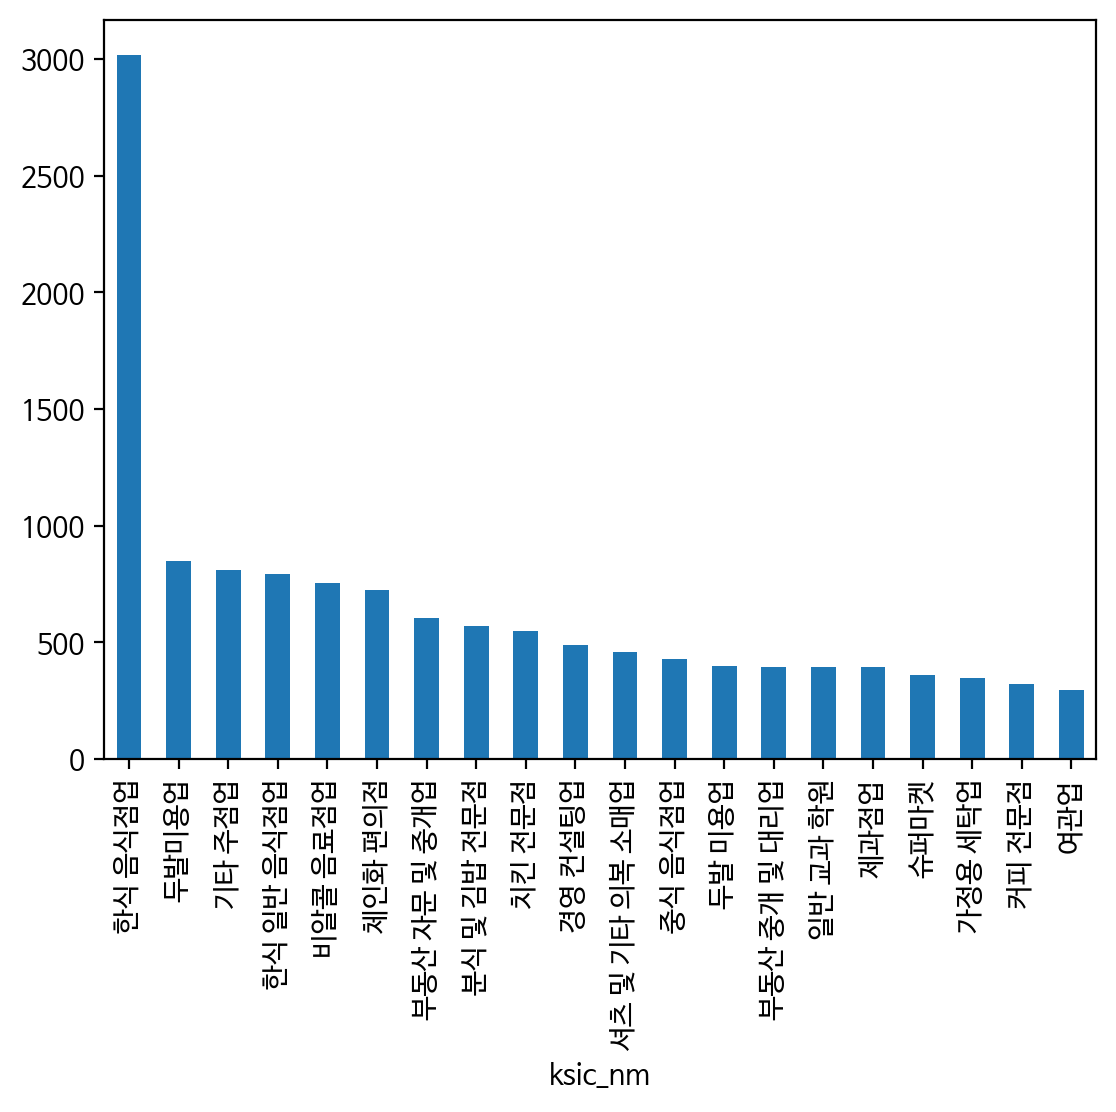

In [ ]:
com['ksic_nm'].value_counts()[:20].plot(kind='bar')

- 상권이 많이 몰린 지역일수록 유동인구가 높은 지역일 것

In [ ]:
# 중심 좌표 설정 (오산시 중심 좌표)
center = [37.1492, 127.0772]

# 상권정보 시각화
business_map = folium.Map(location=center, zoom_start=12)

# 상권 정보를 지도에 추가
for idx, row in commercial_district.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"{row['com_lc_nm']} - {row['com_mc_nm']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(business_map)

# # 결과 지도 저장 및 표시 -> 크롬 계속 오류나서 지도가 안보임
# business_map.save('business_map.html')

In [ ]:
# # 런타임 끊어짐,,,,,,
# business_map

In [ ]:
# 도로명 주소 시각화
business_map = folium.Map(location=center, zoom_start=12)
folium.GeoJson(street_addr).add_to(business_map)

# 결과 지도 표시
business_map